In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
# Read a pandas DataFrame
#df = pd.read_csv("C:\jintu\Formated data_resampled 1H ID1\six months.csv")
df = pd.read_csv("MY3_May_2023_KNN_Imputed.csv")

df

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:30:00,2.200000e+01,8.871990,0.000000,398.496241,3.636364,26.00000,71.000000,45.666667,55.000000
1,2022-07-03 20:45:00,6.700000e+01,3.802281,0.000000,229.323308,0.000000,25.00000,62.000000,44.666667,53.333333
2,2022-07-03 21:00:00,1.120000e+02,12.674271,0.000000,184.210526,0.000000,25.00000,60.000000,43.666667,52.750000
3,2022-07-03 21:15:00,1.560000e+02,16.476553,0.000000,165.413534,0.000000,24.00000,59.666667,43.333333,52.666667
4,2022-07-03 21:30:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.25921,61.186420,18.749892,20.904609
...,...,...,...,...,...,...,...,...,...,...
28042,2023-04-21 23:00:00,1.061851e+06,397.944200,225.108225,700.960219,489.898990,29.00000,69.000000,27.666667,29.000000
28043,2023-04-21 23:15:00,1.061896e+06,392.070485,225.974026,707.818930,492.424242,29.00000,69.000000,31.666667,36.000000
28044,2023-04-21 23:30:00,1.061941e+06,393.538913,225.974026,716.049383,493.686869,29.00000,70.000000,33.333333,39.333333
28045,2023-04-21 23:45:00,1.061986e+06,392.070485,225.108225,727.023320,488.636364,29.00000,70.000000,35.333333,42.666667


In [3]:
df1 = df
df1['Datetime'] = pd.to_datetime(df['Datetime'])

df1 = df.set_index('Datetime')
#df1
df2=df1.resample('1H').mean()
df2.reset_index(inplace = True)
df2.head()

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:00:00,44.500000,6.337136,0.000000,313.909774,1.818182,25.500000,66.500000,45.166667,54.166667
1,2022-07-03 21:00:00,265430.890775,168.057839,95.408180,484.620809,185.998779,25.879605,60.509877,31.124946,36.806471
2,2022-07-03 22:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
3,2022-07-03 23:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
4,2022-07-04 00:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609


In [4]:
df = df2

target1 = 'field1'
test_l = 168
train_l = len(df) - test_l
date = 'Datetime'
# Create a TimeSeries, specifying the time and value columns
series1 = TimeSeries.from_dataframe(df, date, target1)

# Set aside the last 24 hours as a validation series
train1, val1 = series1[:train_l], series1[train_l:]

target2 = 'field2'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series2 = TimeSeries.from_dataframe(df, date, target2)

# Set aside the last 24 hours as a validation series
train2, val2 = series2[:train_l], series2[train_l:]

target3 = 'field3'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series3 = TimeSeries.from_dataframe(df, date, target3)

# Set aside the last 24 hours as a validation series
train3, val3 = series3[:train_l], series3[train_l:]

target4 = 'field4'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series4 = TimeSeries.from_dataframe(df, date, target4)

# Set aside the last 24 hours as a validation series
train4, val4 = series4[:train_l], series4[train_l:]

target7 = 'field7'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series7 = TimeSeries.from_dataframe(df, date, target7)

# Set aside the last 24 hours as a validation series
train7, val7 = series7[:train_l], series7[train_l:]

target8 = 'field8'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series8 = TimeSeries.from_dataframe(df, date, target8)

# Set aside the last 24 hours as a validation series
train8, val8 = series8[:train_l], series8[train_l:]

## kalman filter forecaster model

In [5]:
# from darts.models import KalmanForecaster

# # Train the regression model for target1
# Kalman_model1 = KalmanForecaster()
# Kalman_model1.fit(train1)

# # Test the regression model for target1
# Kalman_predictions1 = Kalman_model1.predict(len(val1))

# # Predict using the regression model for target1
# test_predictions1 = Kalman_model1.predict(len(val1) + test_l)

# # Train the regression model for target2
# Kalman_model2 = KalmanForecaster()
# Kalman_model2.fit(train2)

# # Test the regression model for target2
# Kalman_predictions2 = Kalman_model2.predict(len(val2))

# # Predict using the regression model for target2
# test_predictions2 = Kalman_model2.predict(len(val2) + test_l)

# # Train the regression model for target3
# Kalman_model3 = KalmanForecaster()
# Kalman_model3.fit(train3)

# # Test the regression model for target3
# Kalman_predictions3 = Kalman_model3.predict(len(val3))

# # Predict using the regression model for target3
# test_predictions3 = Kalman_model3.predict(len(val3) + test_l)

# # Train the regression model for target4
# Kalman_model4 = KalmanForecaster()
# Kalman_model4.fit(train4)

# # Test the regression model for target4
# Kalman_predictions4 = Kalman_model4.predict(len(val4))

# # Predict using the regression model for target4
# test_predictions4 = Kalman_model4.predict(len(val4) + test_l)

# # Train the regression model for target7
# Kalman_model7 = KalmanForecaster()
# Kalman_model7.fit(train7)

# # Test the regression model for target7
# Kalman_predictions7 = Kalman_model7.predict(len(val7))

# # Predict using the regression model for target7
# test_predictions7 = Kalman_model7.predict(len(val7) + test_l)

# # Train the regression model for target8
# Kalman_model8 = KalmanForecaster()
# Kalman_model8.fit(train8)

# # Test the regression model for target8
# Kalman_predictions8 = Kalman_model8.predict(len(val8))

# # Predict using the regression model for target8
# test_predictions8 = Kalman_model8.predict(len(val8) + test_l)


In [6]:
from darts.metrics import rmse, mae
from darts.models import KalmanForecaster

# Train the KalmanForecaster model for target1
model1 = KalmanForecaster()
model1.fit(train1)

# Test the KalmanForecaster model for target1
prediction1 = model1.predict(len(val1))

# Calculate RMSE and MAE for target1
rmse1 = rmse(prediction1, val1)
mae1 = mae(prediction1, val1)

# Train the KalmanForecaster model for target2
model2 = KalmanForecaster()
model2.fit(train2)

# Test the KalmanForecaster model for target2
prediction2 = model2.predict(len(val2))

# Calculate RMSE and MAE for target2
rmse2 = rmse(prediction2, val2)
mae2 = mae(prediction2, val2)

# Train the KalmanForecaster model for target3
model3 = KalmanForecaster()
model3.fit(train3)

# Test the KalmanForecaster model for target3
prediction3 = model3.predict(len(val3))

# Calculate RMSE and MAE for target3
rmse3 = rmse(prediction3, val3)
mae3 = mae(prediction3, val3)

# Train the KalmanForecaster model for target4
model4 = KalmanForecaster()
model4.fit(train4)

# Test the KalmanForecaster model for target4
prediction4 = model4.predict(len(val4))

# Calculate RMSE and MAE for target4
rmse4 = rmse(prediction4, val4)
mae4 = mae(prediction4, val4)

# Train the KalmanForecaster model for target7
model7 = KalmanForecaster()
model7.fit(train7)

# Test the KalmanForecaster model for target7
prediction7 = model7.predict(len(val7))

# Calculate RMSE and MAE for target7
rmse7 = rmse(prediction7, val7)
mae7 = mae(prediction7, val7)

# Train the KalmanForecaster model for target8
model8 = KalmanForecaster()
model8.fit(train8)

# Test the KalmanForecaster model for target8
prediction8 = model8.predict(len(val8))

# Calculate RMSE and MAE for target8
rmse8 = rmse(prediction8, val8)
mae8 = mae(prediction8, val8)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Target': ['target1', 'target2', 'target3', 'target4', 'target7', 'target8'],
    'RMSE': [rmse1, rmse2, rmse3, rmse4, rmse7, rmse8],
    'MAE': [mae1, mae2, mae3, mae4, mae7, mae8]
})

# Save the results to a CSV file
results.to_csv('KalmanForecaster_error.csv', index=False)


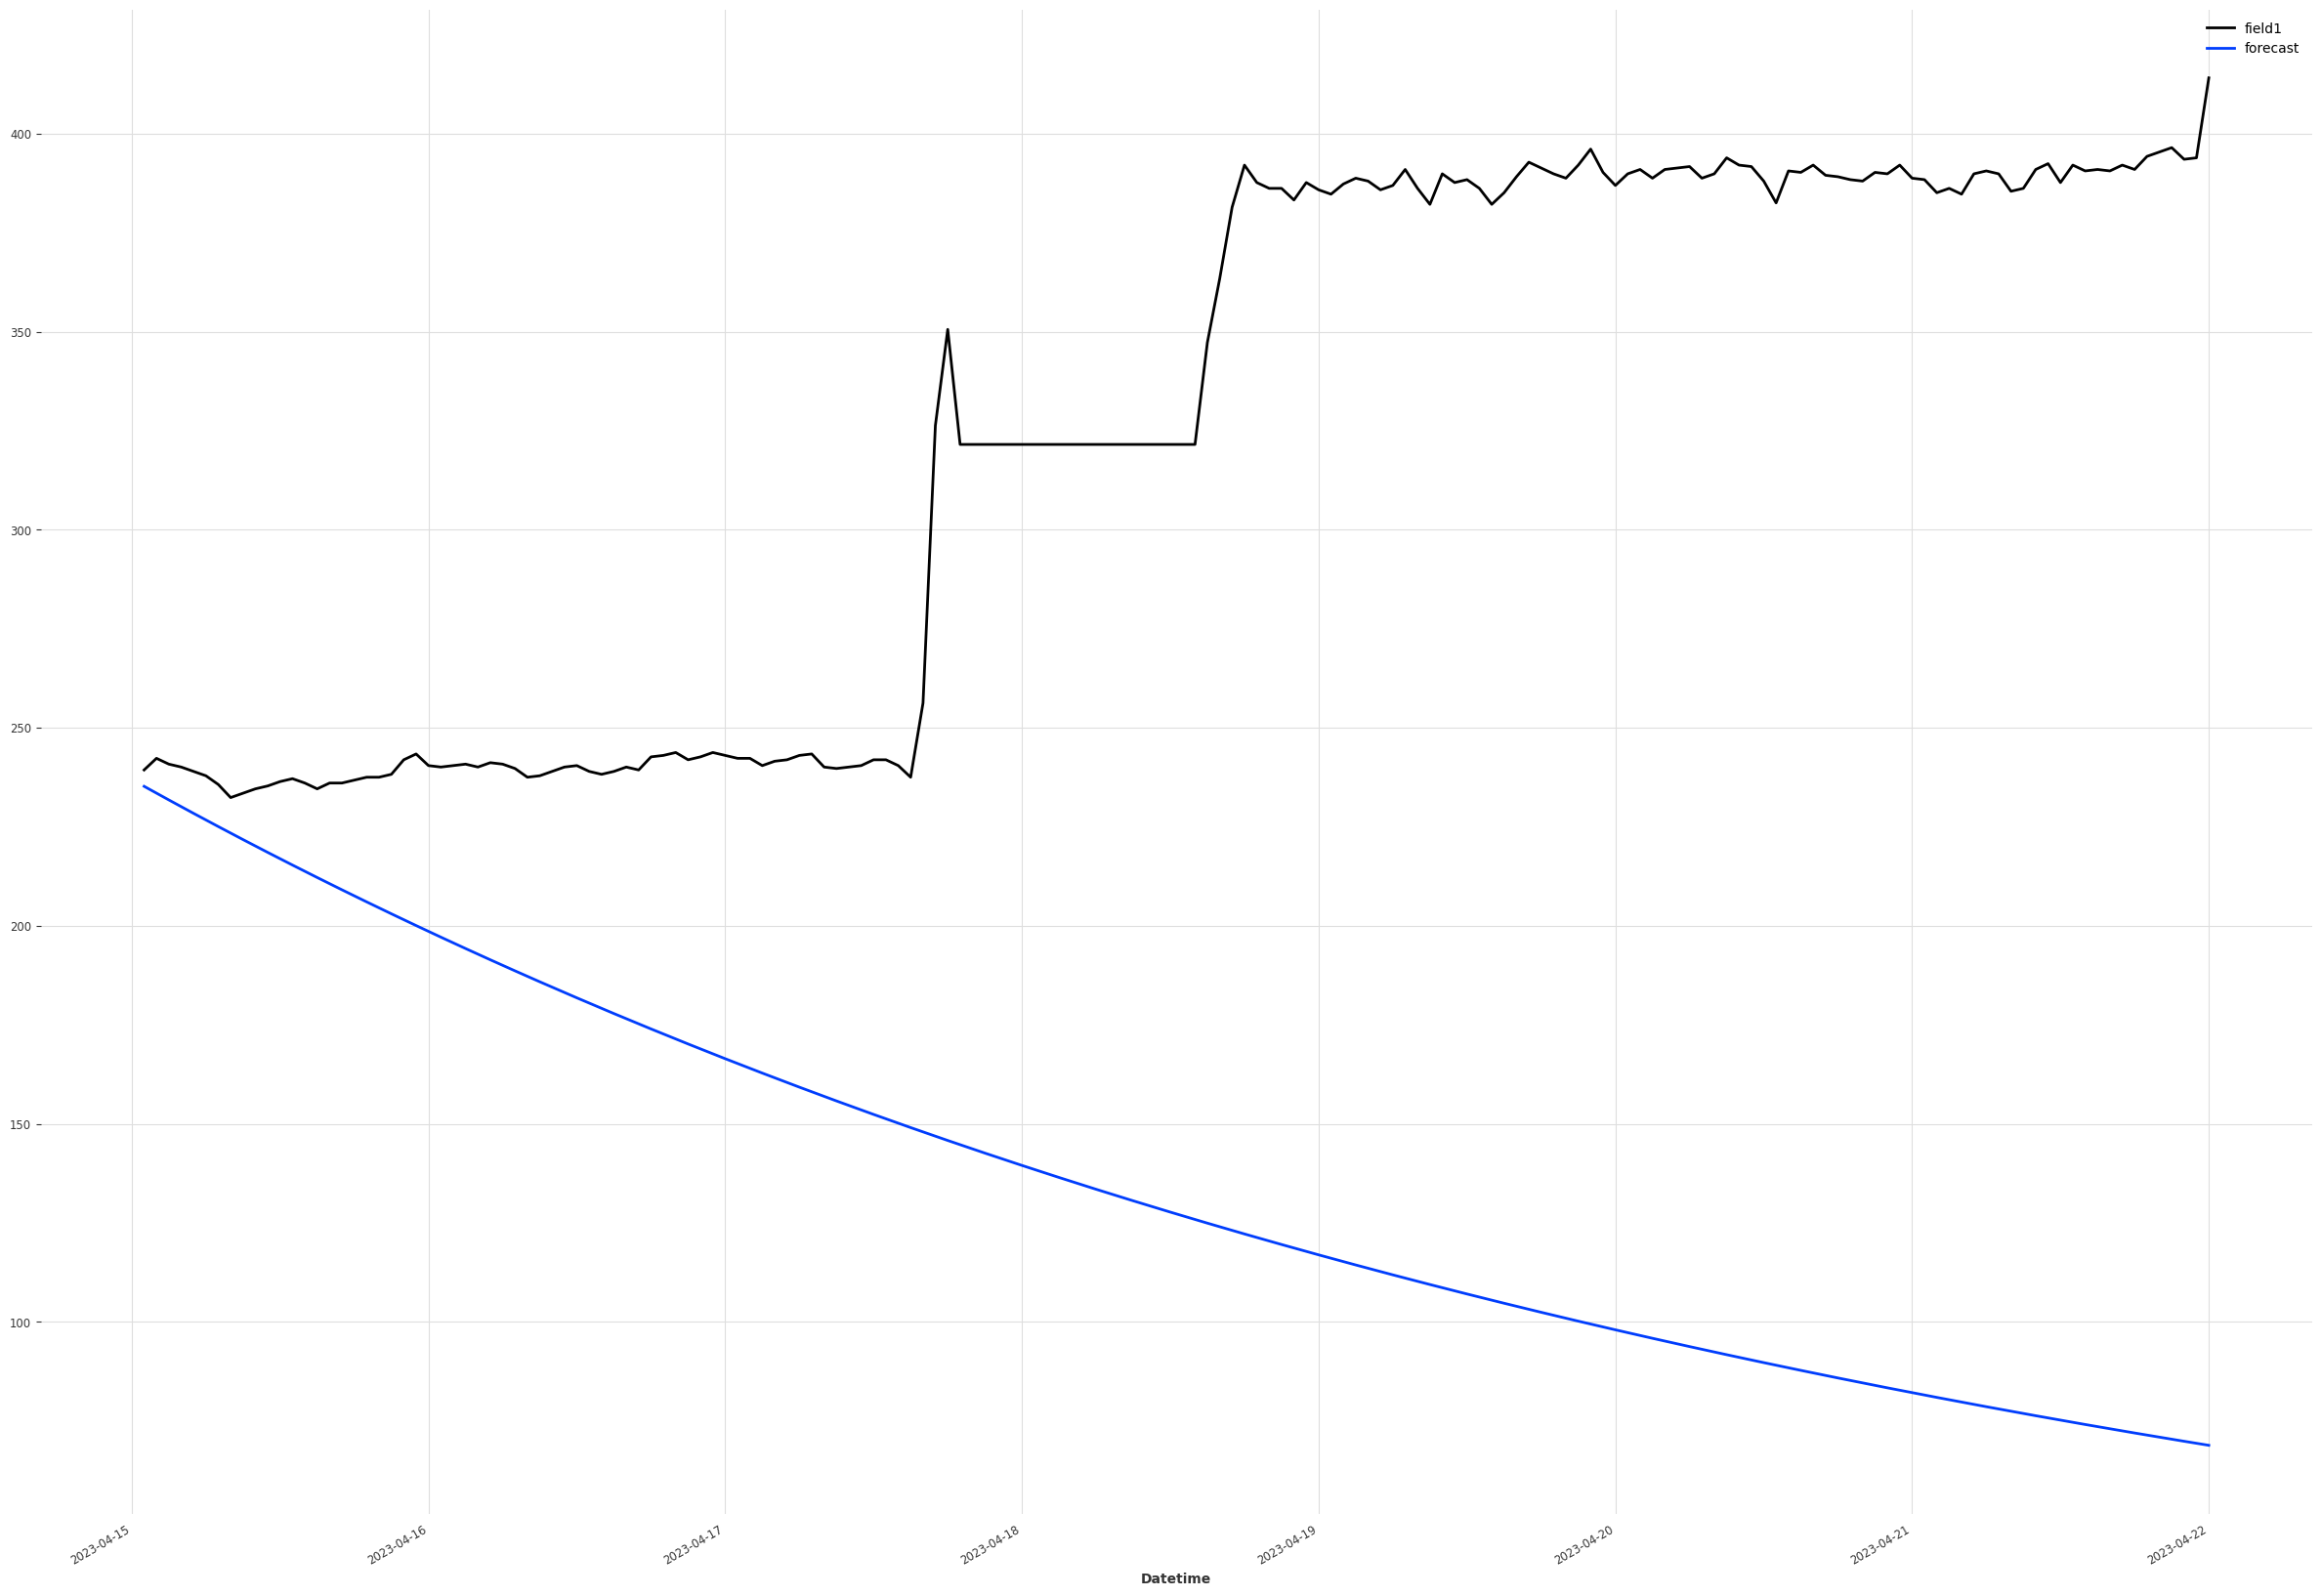

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 20]
val1.plot()
prediction1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

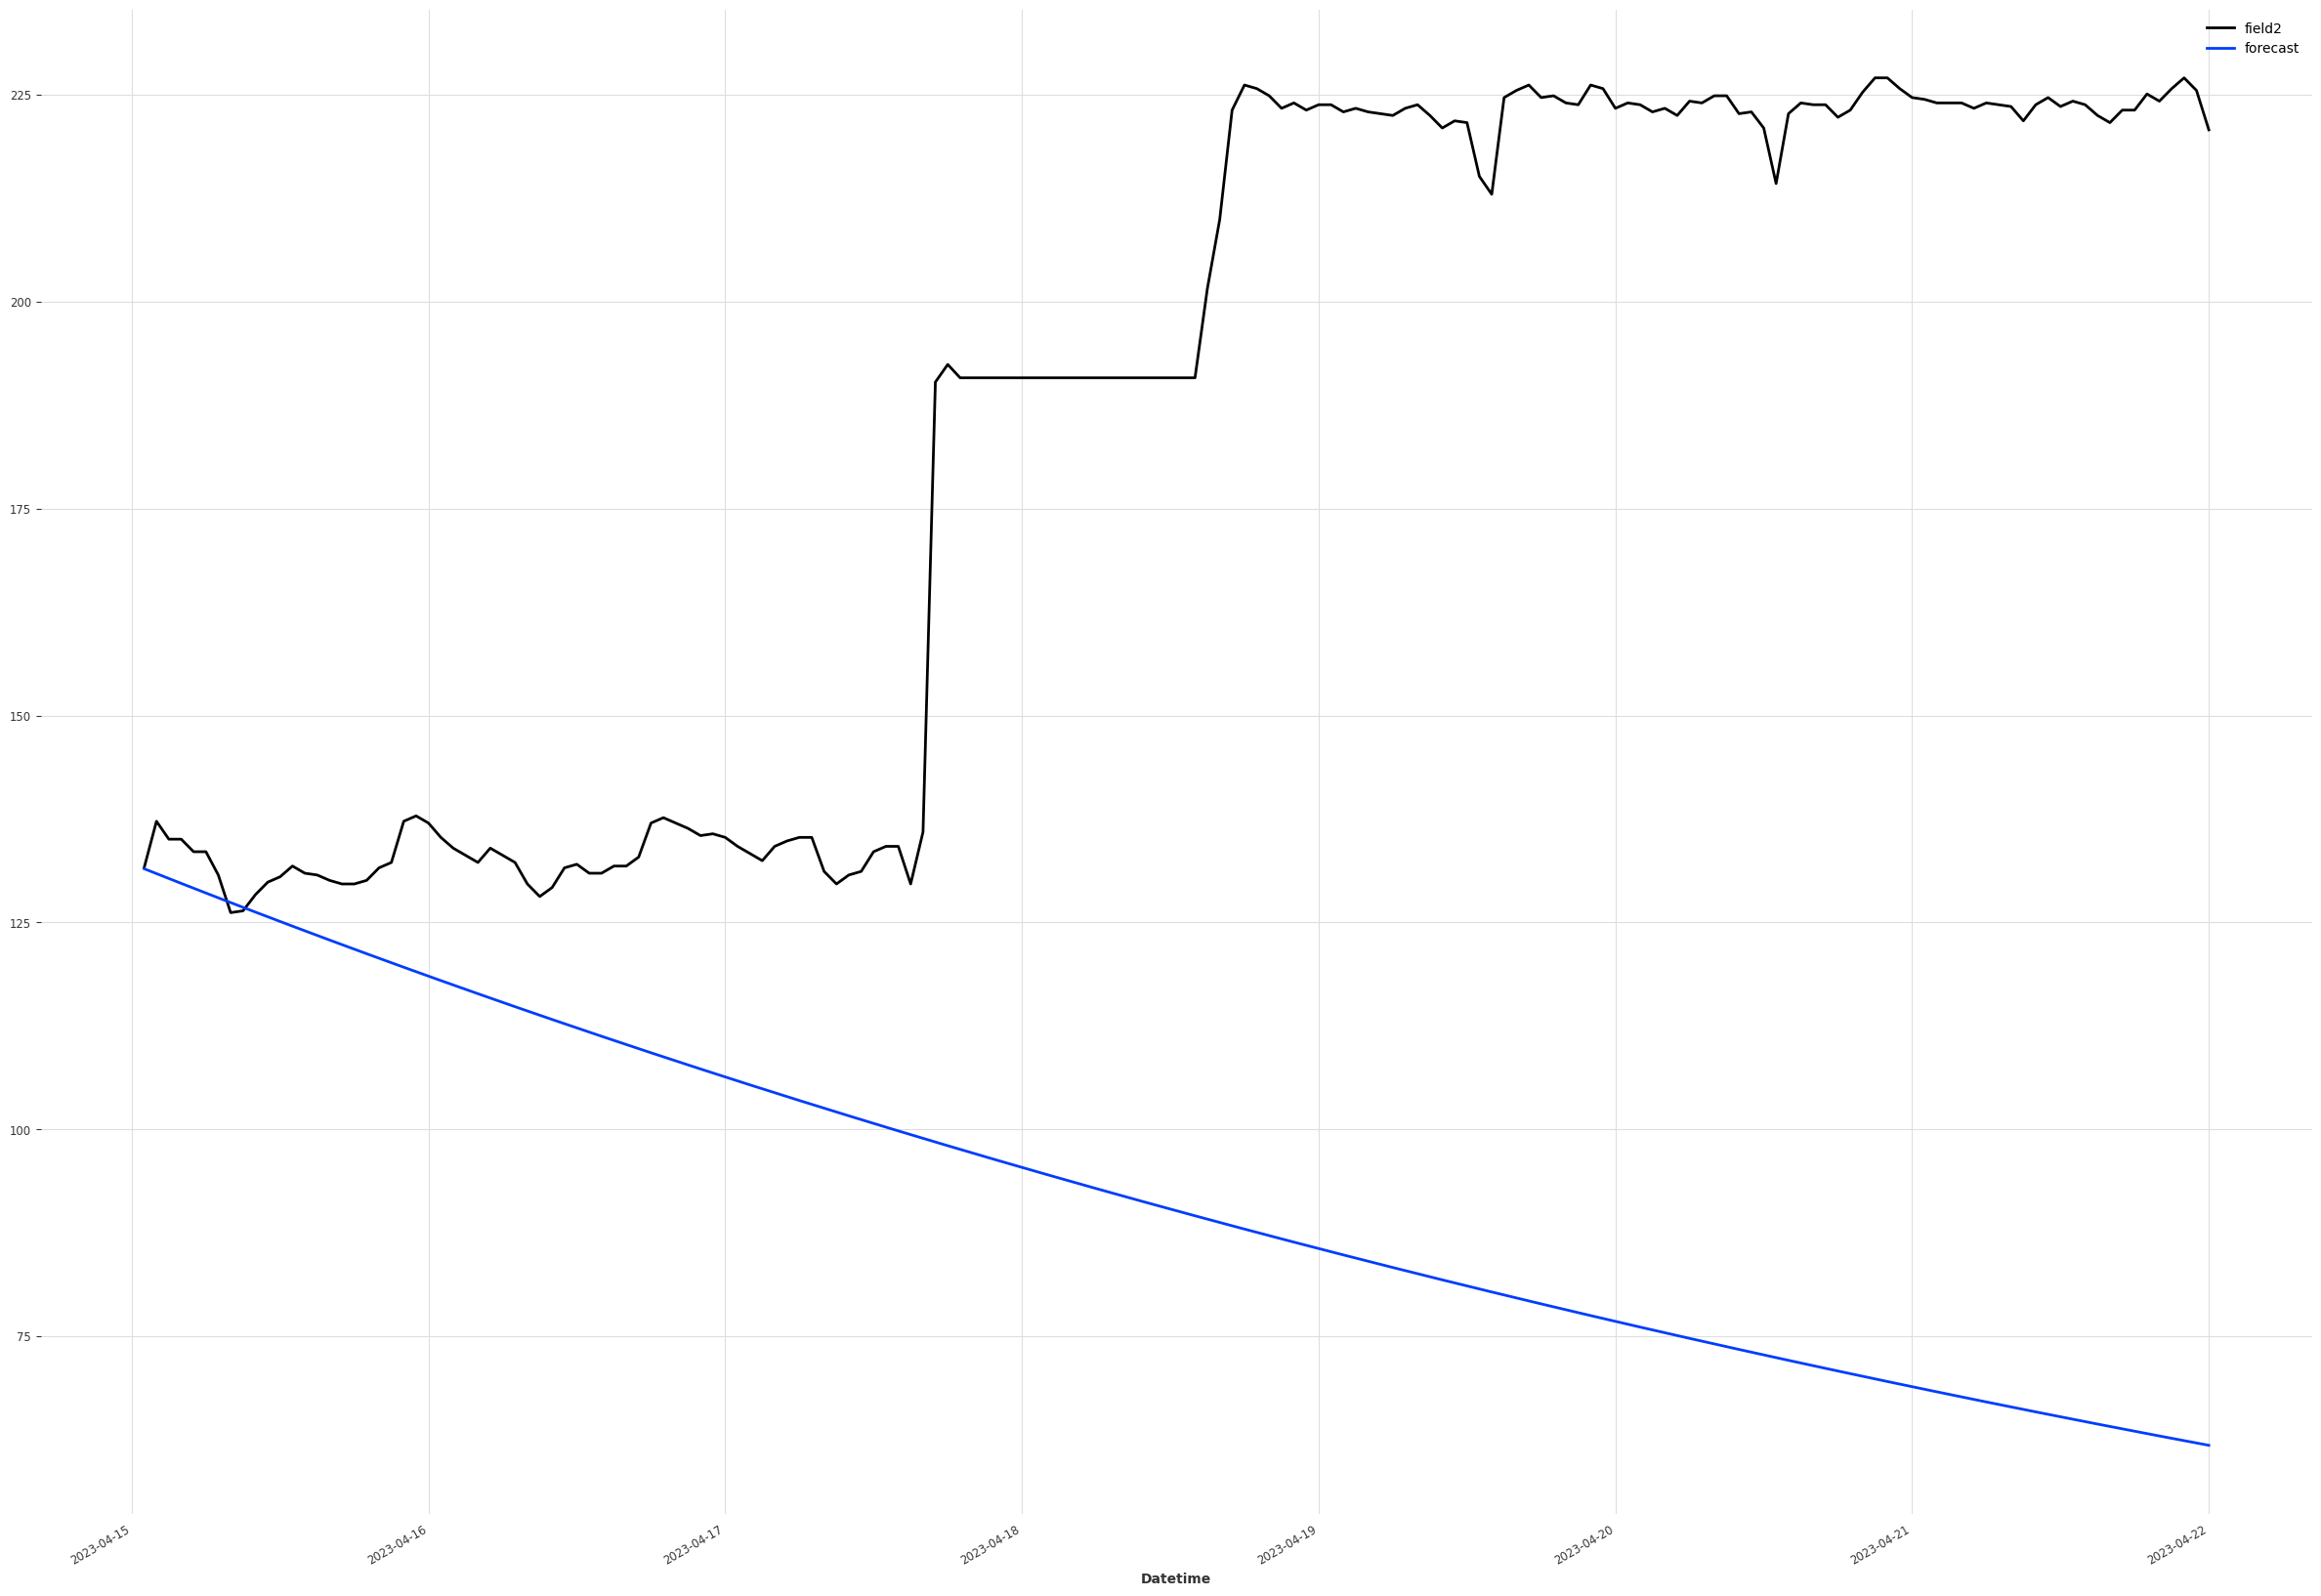

In [9]:
plt.rcParams['figure.figsize'] = [30, 20]
val2.plot()
prediction2.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

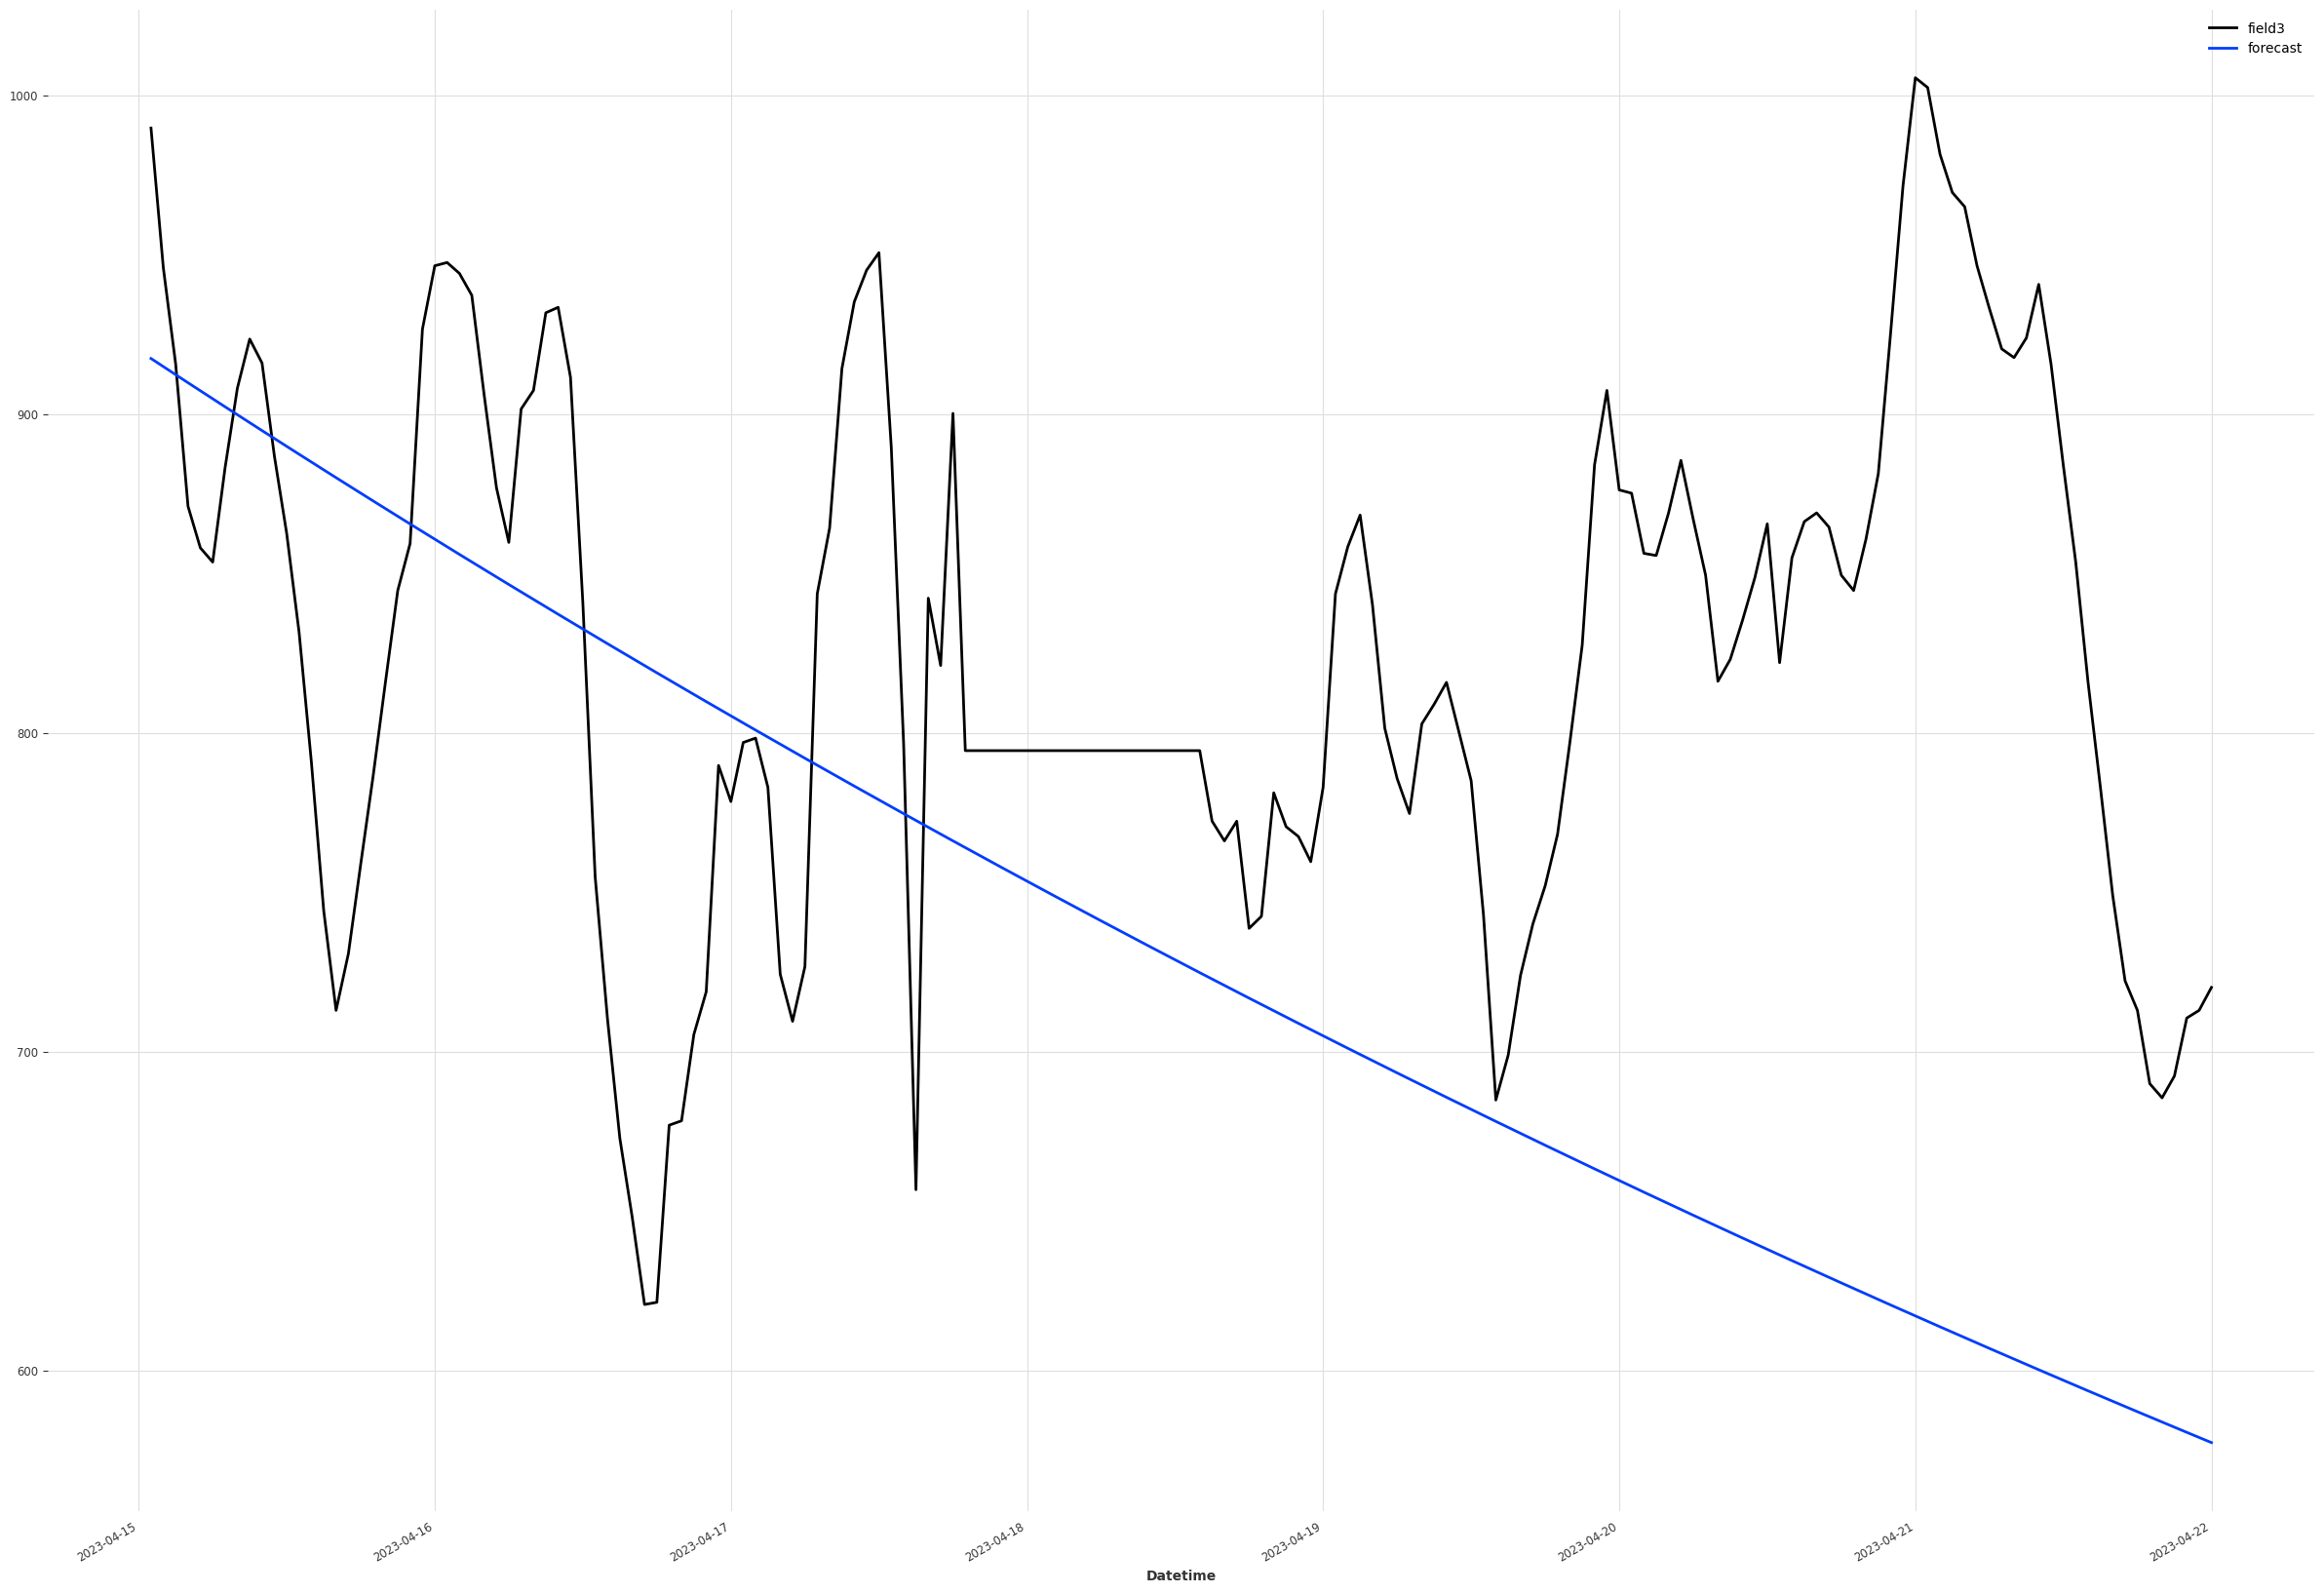

In [10]:
plt.rcParams['figure.figsize'] = [30, 20]
val3.plot()
prediction3.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

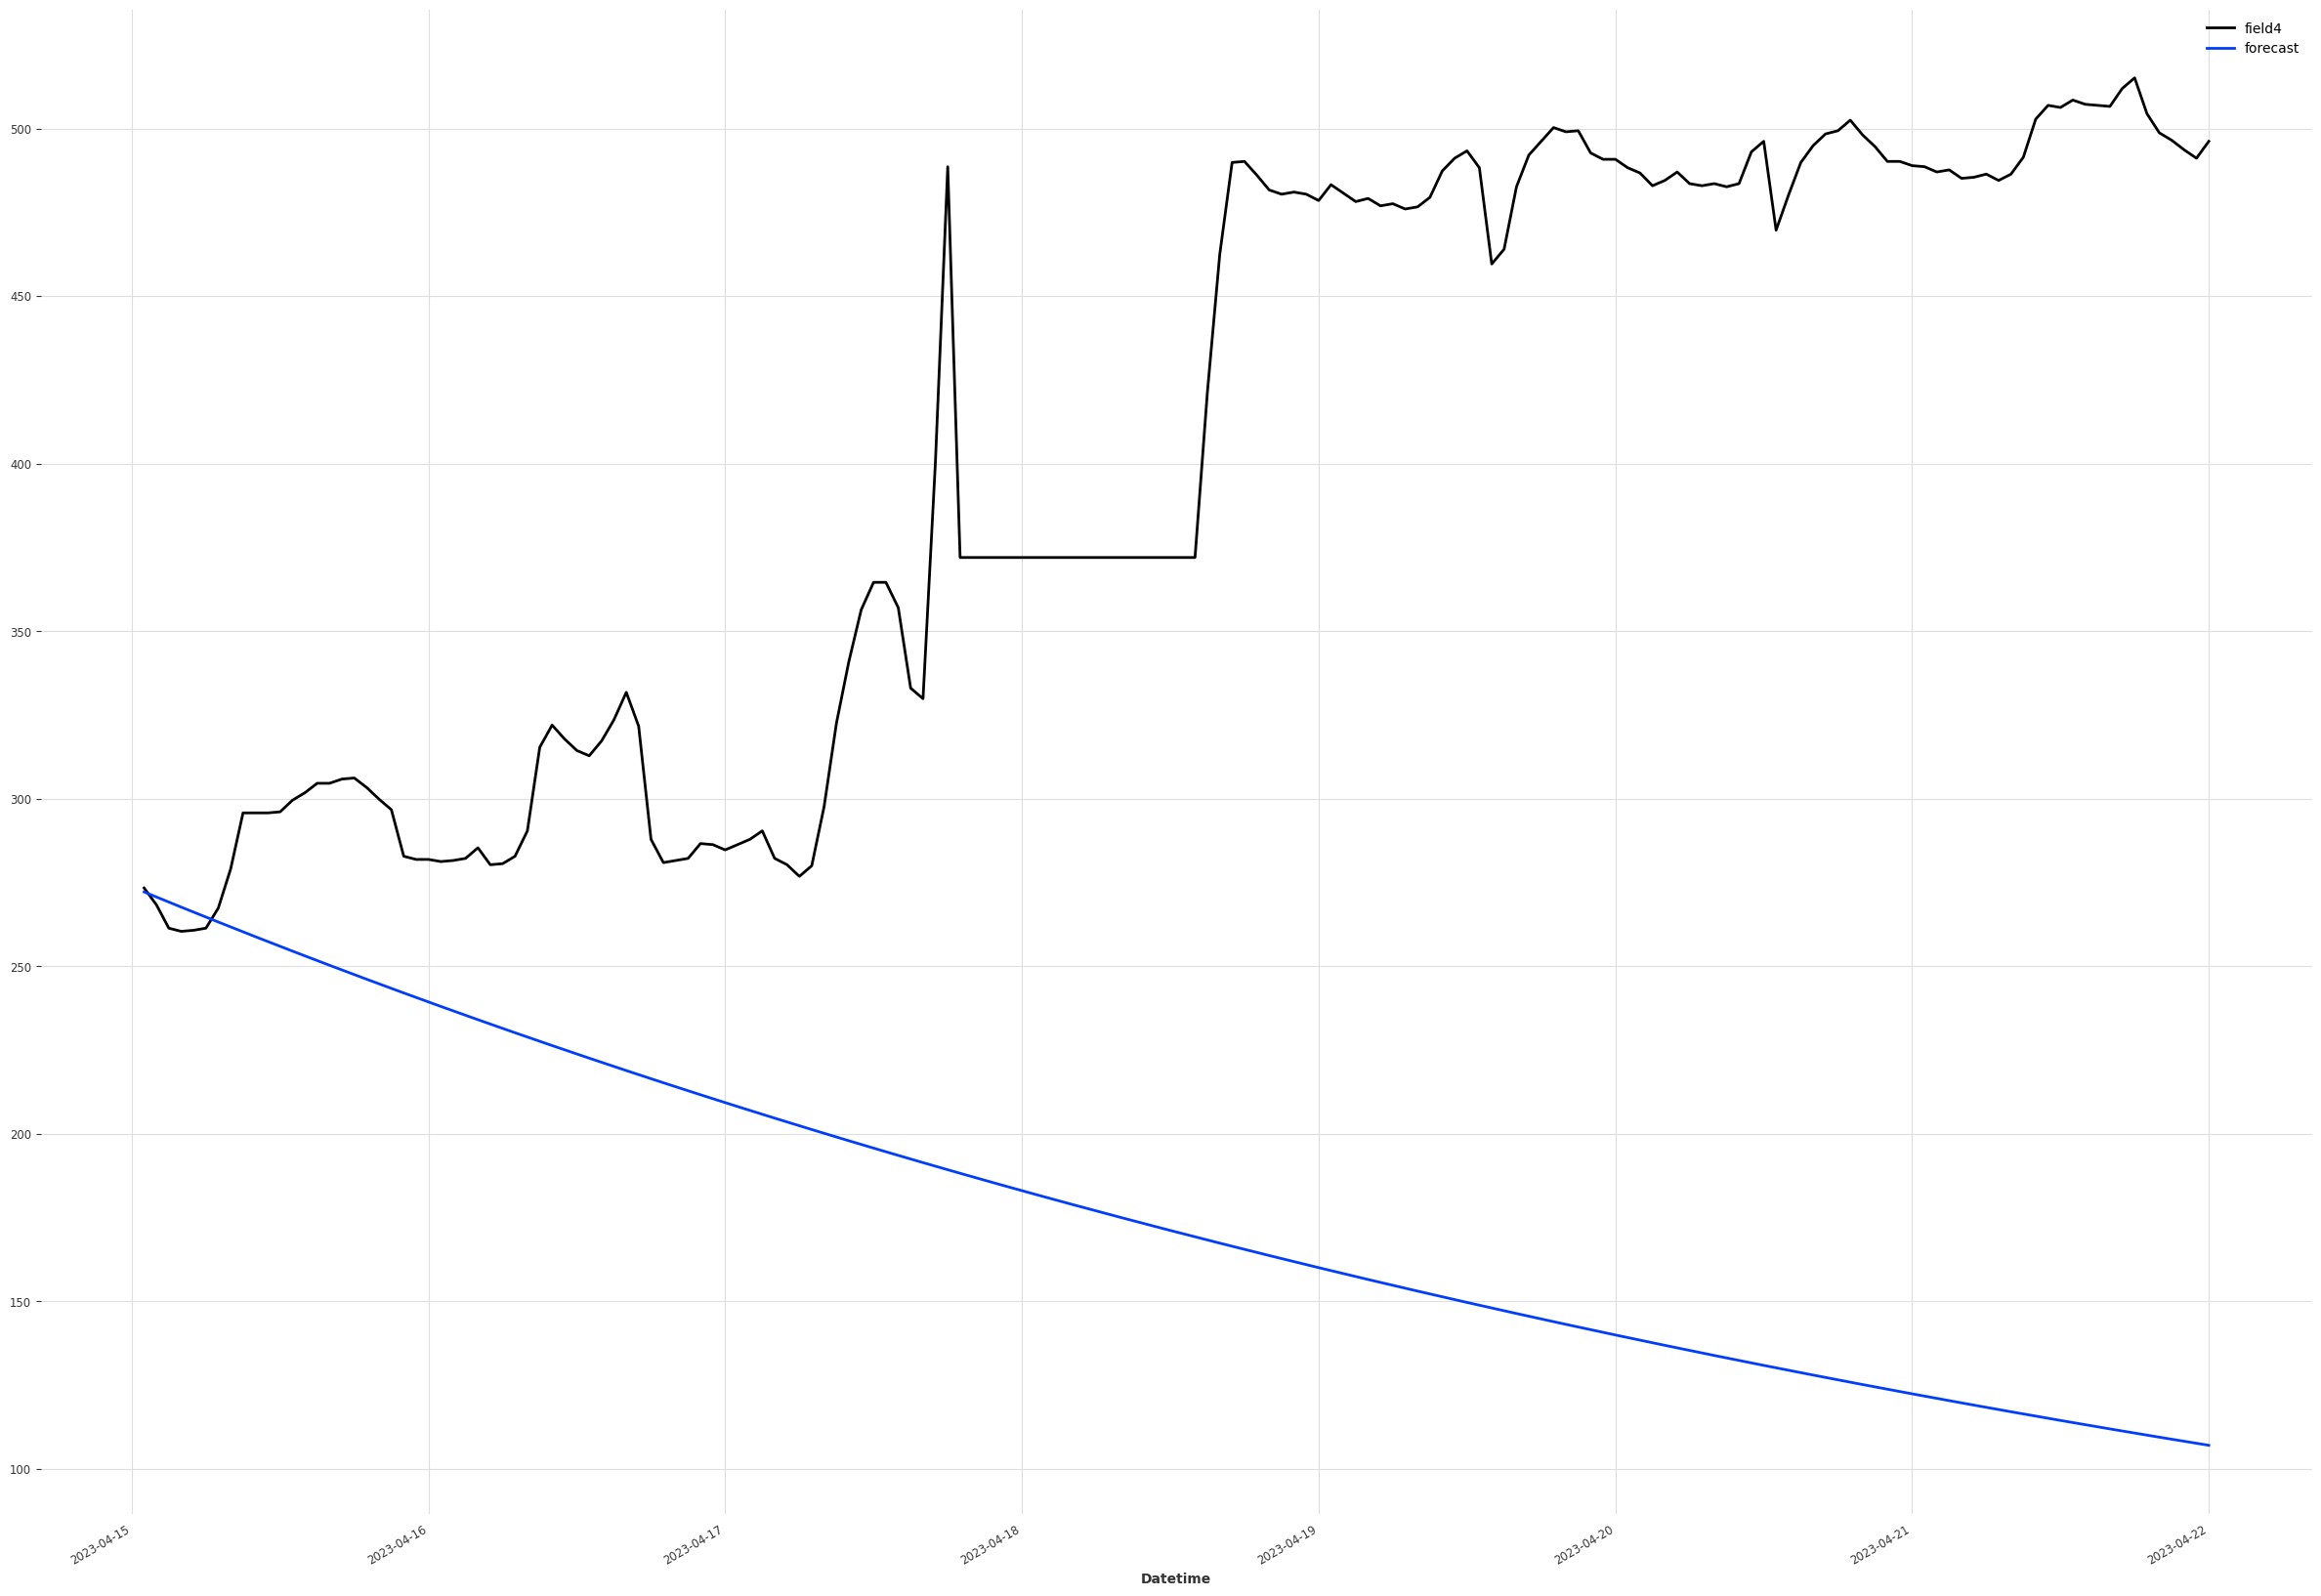

In [11]:
plt.rcParams['figure.figsize'] = [30, 20]
val4.plot()
prediction4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

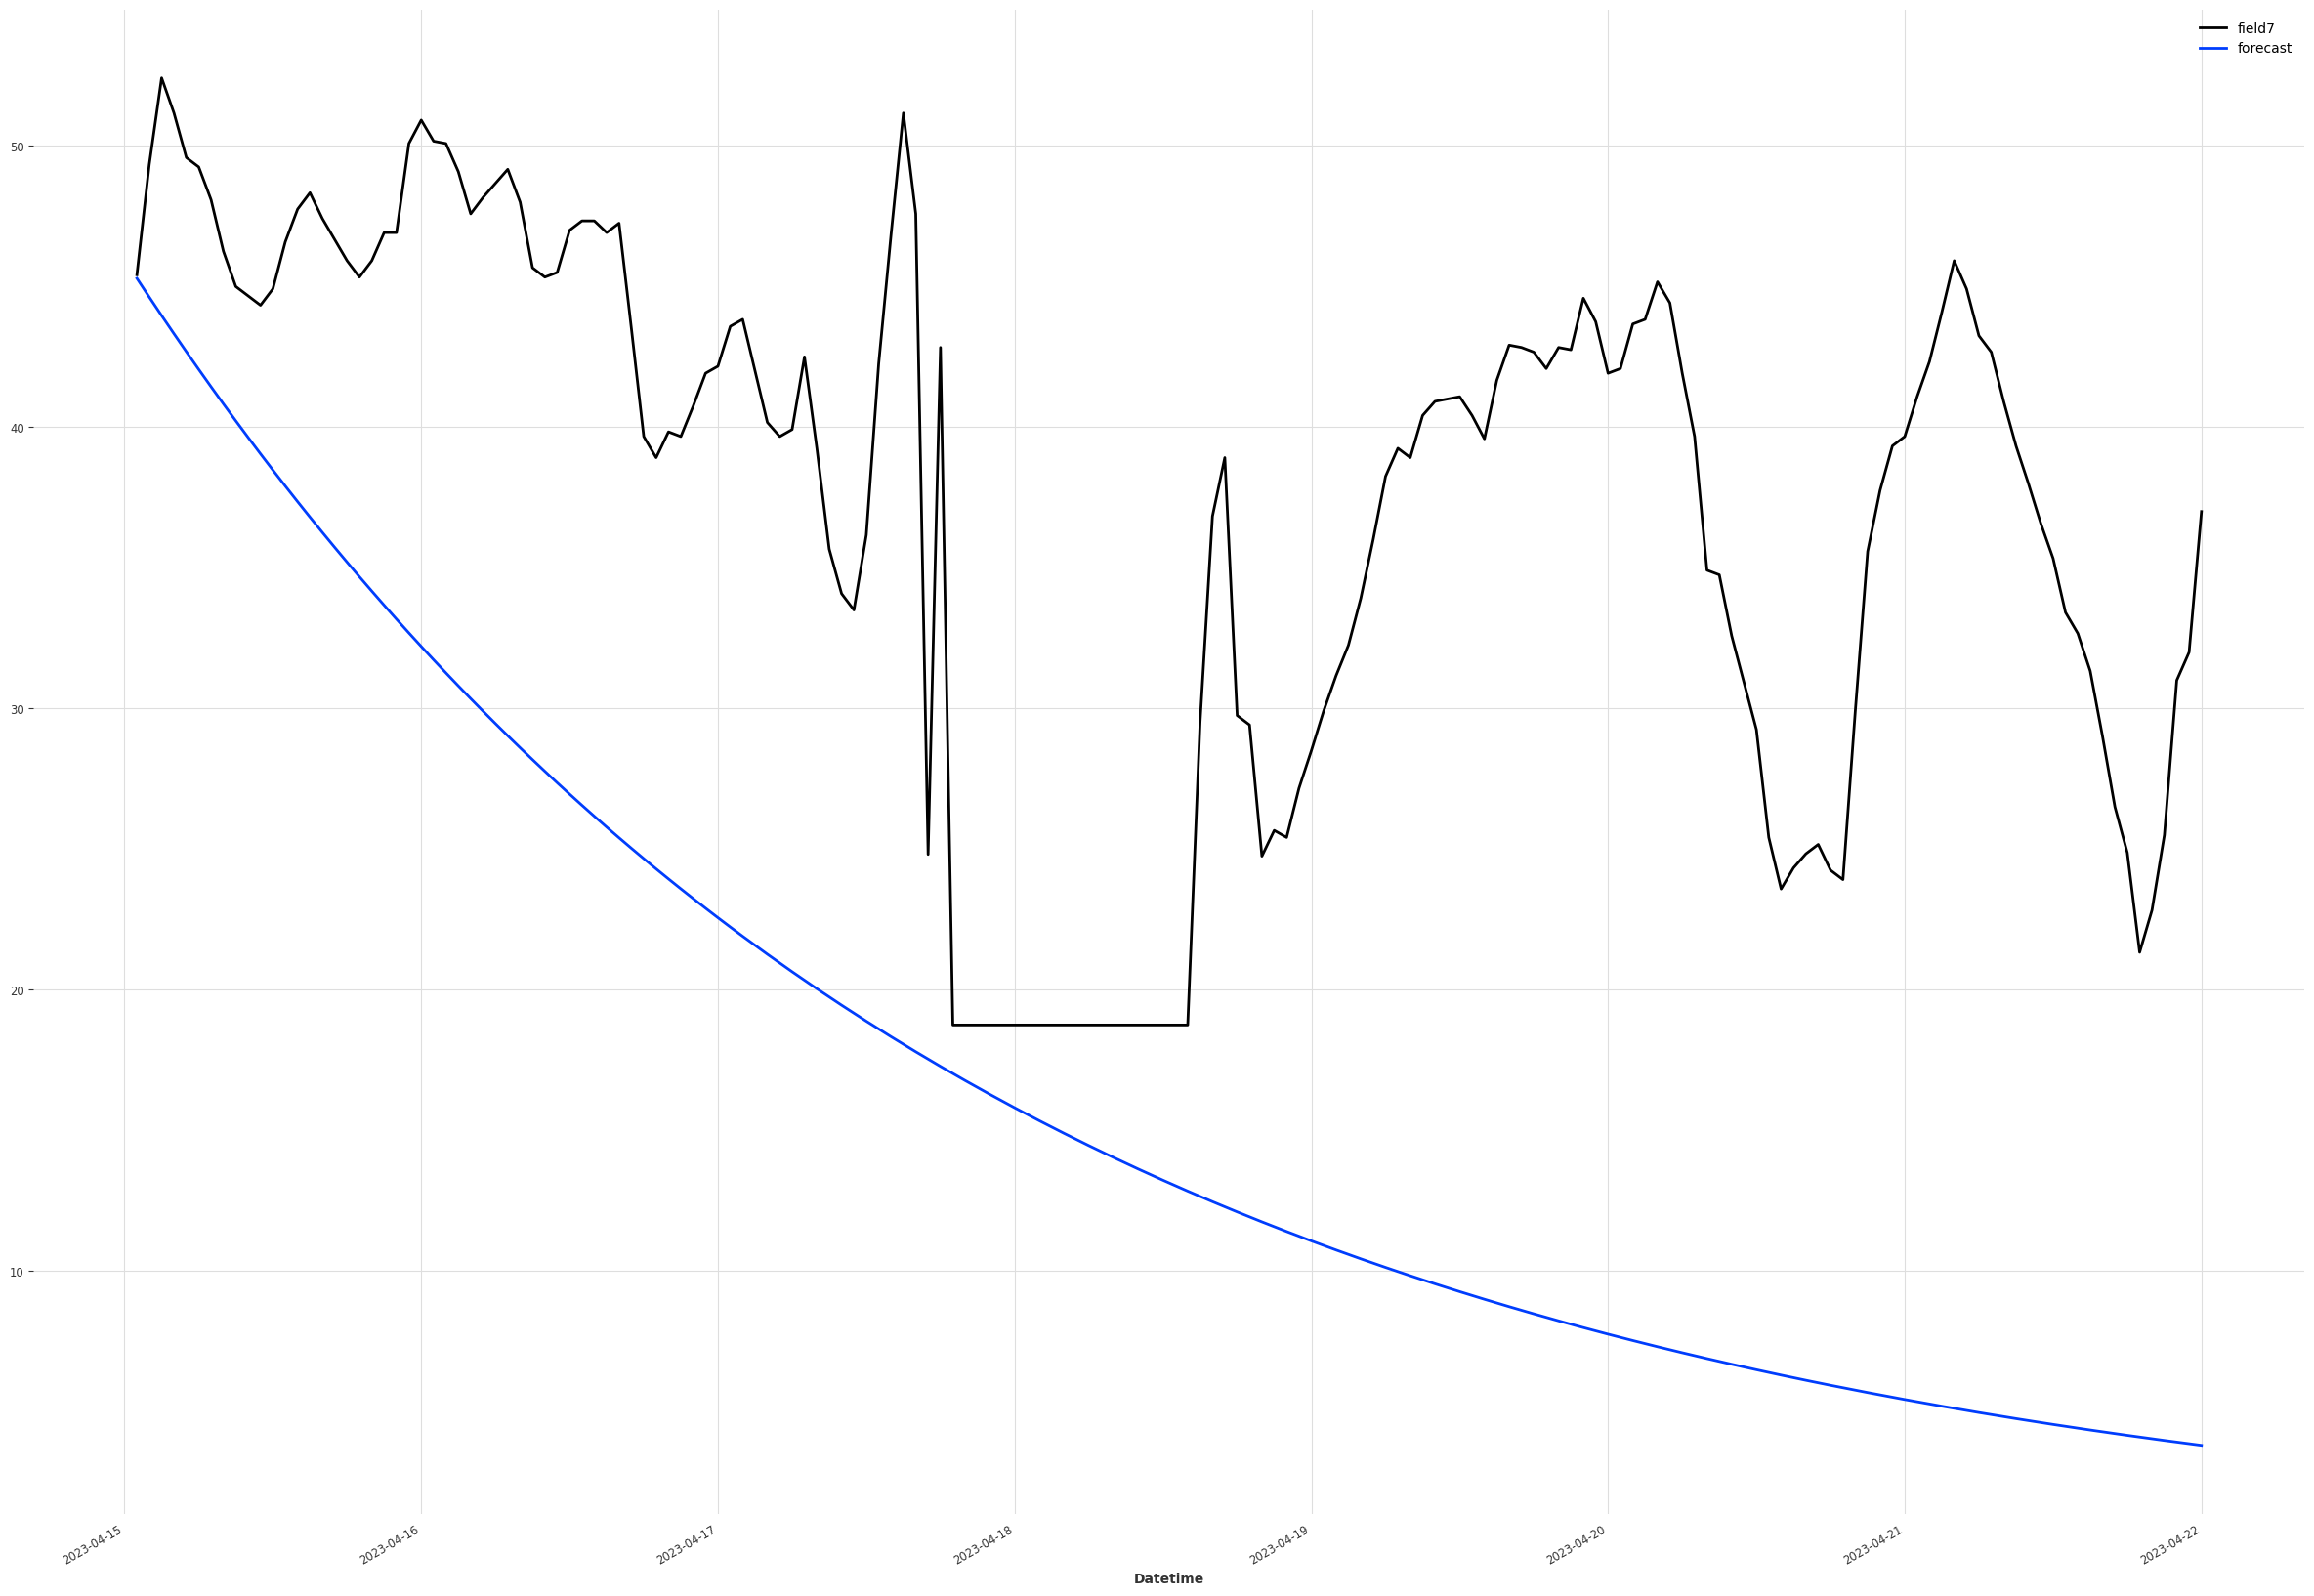

In [12]:
plt.rcParams['figure.figsize'] = [30, 20]
val7.plot()
prediction7.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

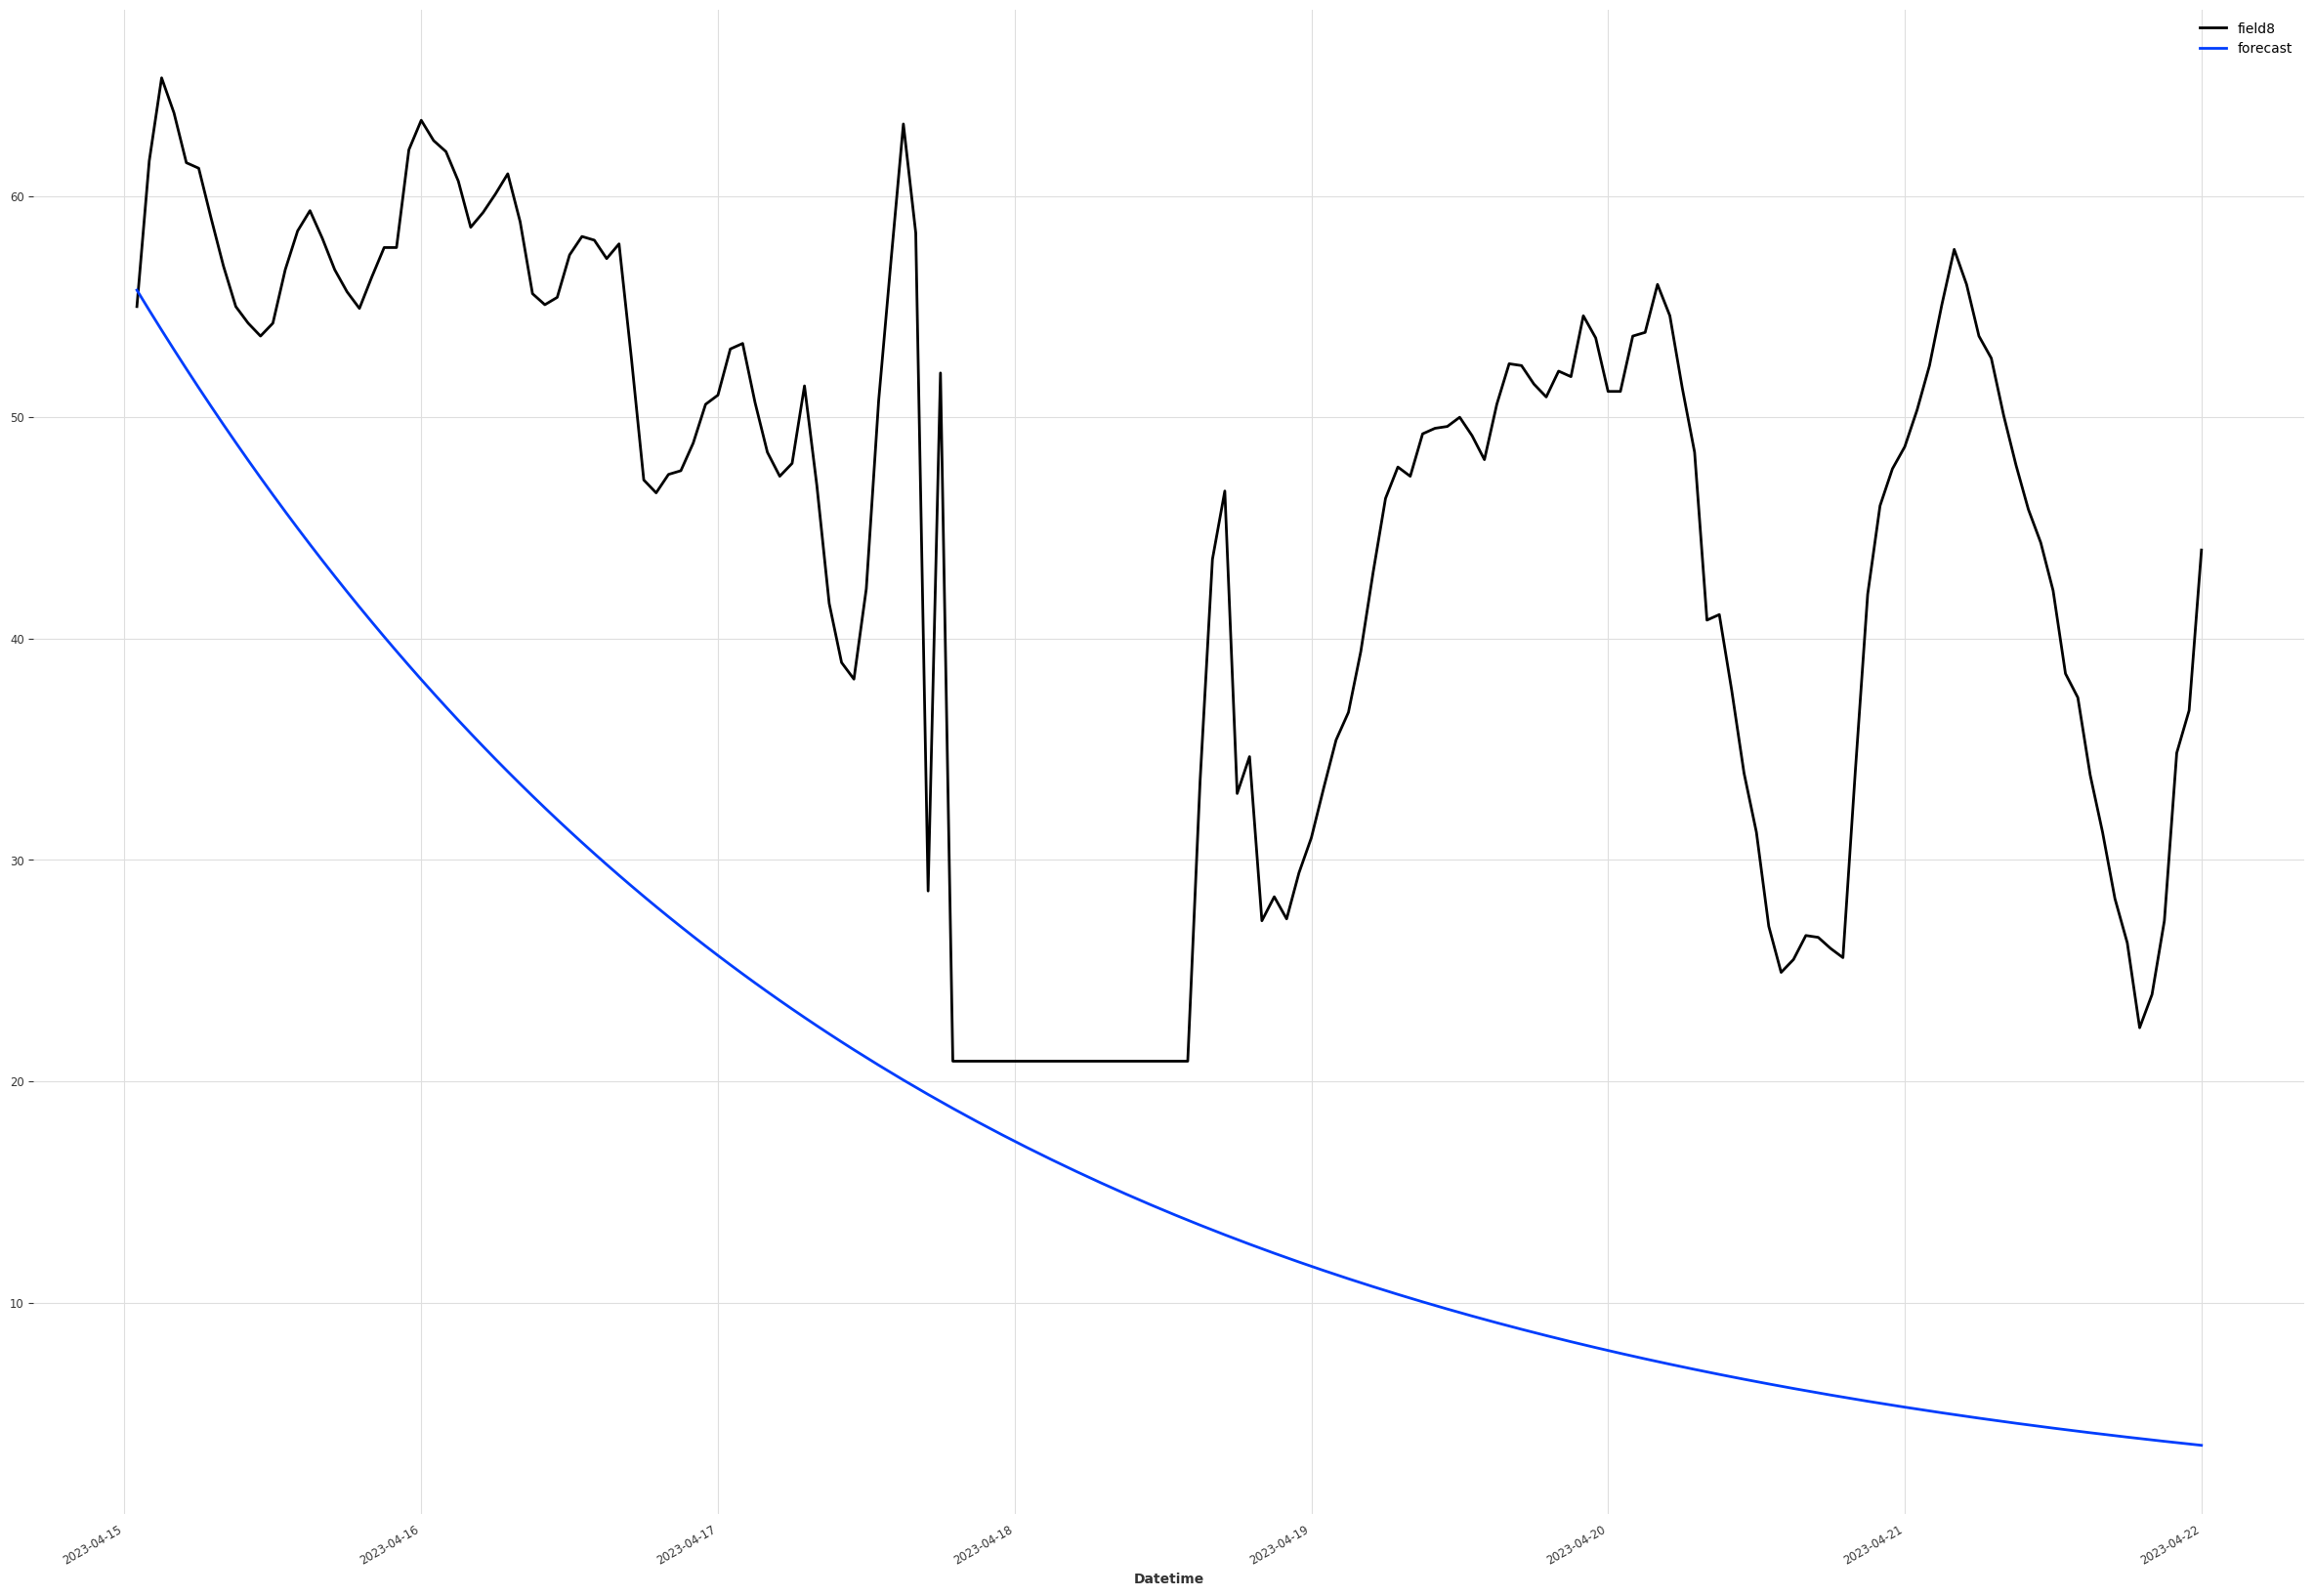

In [13]:
plt.rcParams['figure.figsize'] = [30, 20]
val8.plot()
prediction8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

## Facebook Prophet

In [27]:
# from darts.models import Prophet

# # Train the Prophet model for target1
# prophet_model1 = Prophet()
# prophet_model1.fit(train1)

# # Test the Prophet model for target1
# prophet_predictions1 = prophet_model1.predict(len(val1))

# # Predict using the Prophet model for target1
# test_predictions1 = prophet_model1.predict(len(val1) + test_l)

# # Train the Prophet model for target2
# prophet_model2 = Prophet()
# prophet_model2.fit(train2)

# # Test the Prophet model for target2
# prophet_predictions2 = prophet_model2.predict(len(val2))

# # Predict using the Prophet model for target2
# test_predictions2 = prophet_model2.predict(len(val2) + test_l)

# # Train the Prophet model for target3
# prophet_model3 = Prophet()
# prophet_model3.fit(train3)

# # Test the Prophet model for target3
# prophet_predictions3 = prophet_model3.predict(len(val3))

# # Predict using the Prophet model for target3
# test_predictions3 = prophet_model3.predict(len(val3) + test_l)

# # Train the Prophet model for target4
# prophet_model4 = Prophet()
# prophet_model4.fit(train4)

# # Test the Prophet model for target4
# prophet_predictions4 = prophet_model4.predict(len(val4))

# # Predict using the Prophet model for target4
# test_predictions4 = prophet_model4.predict(len(val4) + test_l)

# # Train the Prophet model for target7
# prophet_model7 = Prophet()
# prophet_model7.fit(train7)

# # Test the Prophet model for target7
# prophet_predictions7 = prophet_model7.predict(len(val7))

# # Predict using the Prophet model for target7
# test_predictions7 = prophet_model7.predict(len(val7) + test_l)

# # Train the Prophet model for target8
# prophet_model8 = Prophet()
# prophet_model8.fit(train8)

# # Test the Prophet model for target8
# prophet_predictions8 = prophet_model8.predict(len(val8))

# # Predict using the Prophet model for target8
# test_predictions8 = prophet_model8.predict(len(val8) + test_l)


11:30:44 - cmdstanpy - INFO - Chain [1] start processing
11:30:45 - cmdstanpy - INFO - Chain [1] done processing
11:30:46 - cmdstanpy - INFO - Chain [1] start processing
11:30:48 - cmdstanpy - INFO - Chain [1] done processing
11:30:49 - cmdstanpy - INFO - Chain [1] start processing
11:30:50 - cmdstanpy - INFO - Chain [1] done processing
11:30:51 - cmdstanpy - INFO - Chain [1] start processing
11:30:52 - cmdstanpy - INFO - Chain [1] done processing
11:30:53 - cmdstanpy - INFO - Chain [1] start processing
11:30:54 - cmdstanpy - INFO - Chain [1] done processing
11:30:55 - cmdstanpy - INFO - Chain [1] start processing
11:30:56 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
import pandas as pd
from darts.metrics import rmse, mae
from darts.models import Prophet

# Train the Prophet model for target1
model1 = Prophet()
model1.fit(train1)

# Test the Prophet model for target1
prediction1 = model1.predict(len(val1))

# Calculate RMSE and MAE for target1
rmse1 = rmse(prediction1, val1)
mae1 = mae(prediction1, val1)

# Train the Prophet model for target2
model2 = Prophet()
model2.fit(train2)

# Test the Prophet model for target2
prediction2 = model2.predict(len(val2))

# Calculate RMSE and MAE for target2
rmse2 = rmse(prediction2, val2)
mae2 = mae(prediction2, val2)

# Train the Prophet model for target3
model3 = Prophet()
model3.fit(train3)

# Test the Prophet model for target3
prediction3 = model3.predict(len(val3))

# Calculate RMSE and MAE for target3
rmse3 = rmse(prediction3, val3)
mae3 = mae(prediction3, val3)

# Train the Prophet model for target4
model4 = Prophet()
model4.fit(train4)

# Test the Prophet model for target4
prediction4 = model4.predict(len(val4))

# Calculate RMSE and MAE for target4
rmse4 = rmse(prediction4, val4)
mae4 = mae(prediction4, val4)

# Train the Prophet model for target7
model7 = Prophet()
model7.fit(train7)

# Test the Prophet model for target7
prediction7 = model7.predict(len(val7))

# Calculate RMSE and MAE for target7
rmse7 = rmse(prediction7, val7)
mae7 = mae(prediction7, val7)

# Train the Prophet model for target8
model8 = Prophet()
model8.fit(train8)

# Test the Prophet model for target8
prediction8 = model8.predict(len(val8))

# Calculate RMSE and MAE for target8
rmse8 = rmse(prediction8, val8)
mae8 = mae(prediction8, val8)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Target': ['target1', 'target2', 'target3', 'target4', 'target7', 'target8'],
    'RMSE': [rmse1, rmse2, rmse3, rmse4, rmse7, rmse8],
    'MAE': [mae1, mae2, mae3, mae4, mae7, mae8]
})

# Save the results to a CSV file
results.to_csv('Prophet_error.csv', index=False)


12:20:19 - cmdstanpy - INFO - Chain [1] start processing
12:20:20 - cmdstanpy - INFO - Chain [1] done processing
12:20:21 - cmdstanpy - INFO - Chain [1] start processing
12:20:24 - cmdstanpy - INFO - Chain [1] done processing
12:20:25 - cmdstanpy - INFO - Chain [1] start processing
12:20:27 - cmdstanpy - INFO - Chain [1] done processing
12:20:28 - cmdstanpy - INFO - Chain [1] start processing
12:20:30 - cmdstanpy - INFO - Chain [1] done processing
12:20:30 - cmdstanpy - INFO - Chain [1] start processing
12:20:32 - cmdstanpy - INFO - Chain [1] done processing
12:20:33 - cmdstanpy - INFO - Chain [1] start processing
12:20:34 - cmdstanpy - INFO - Chain [1] done processing


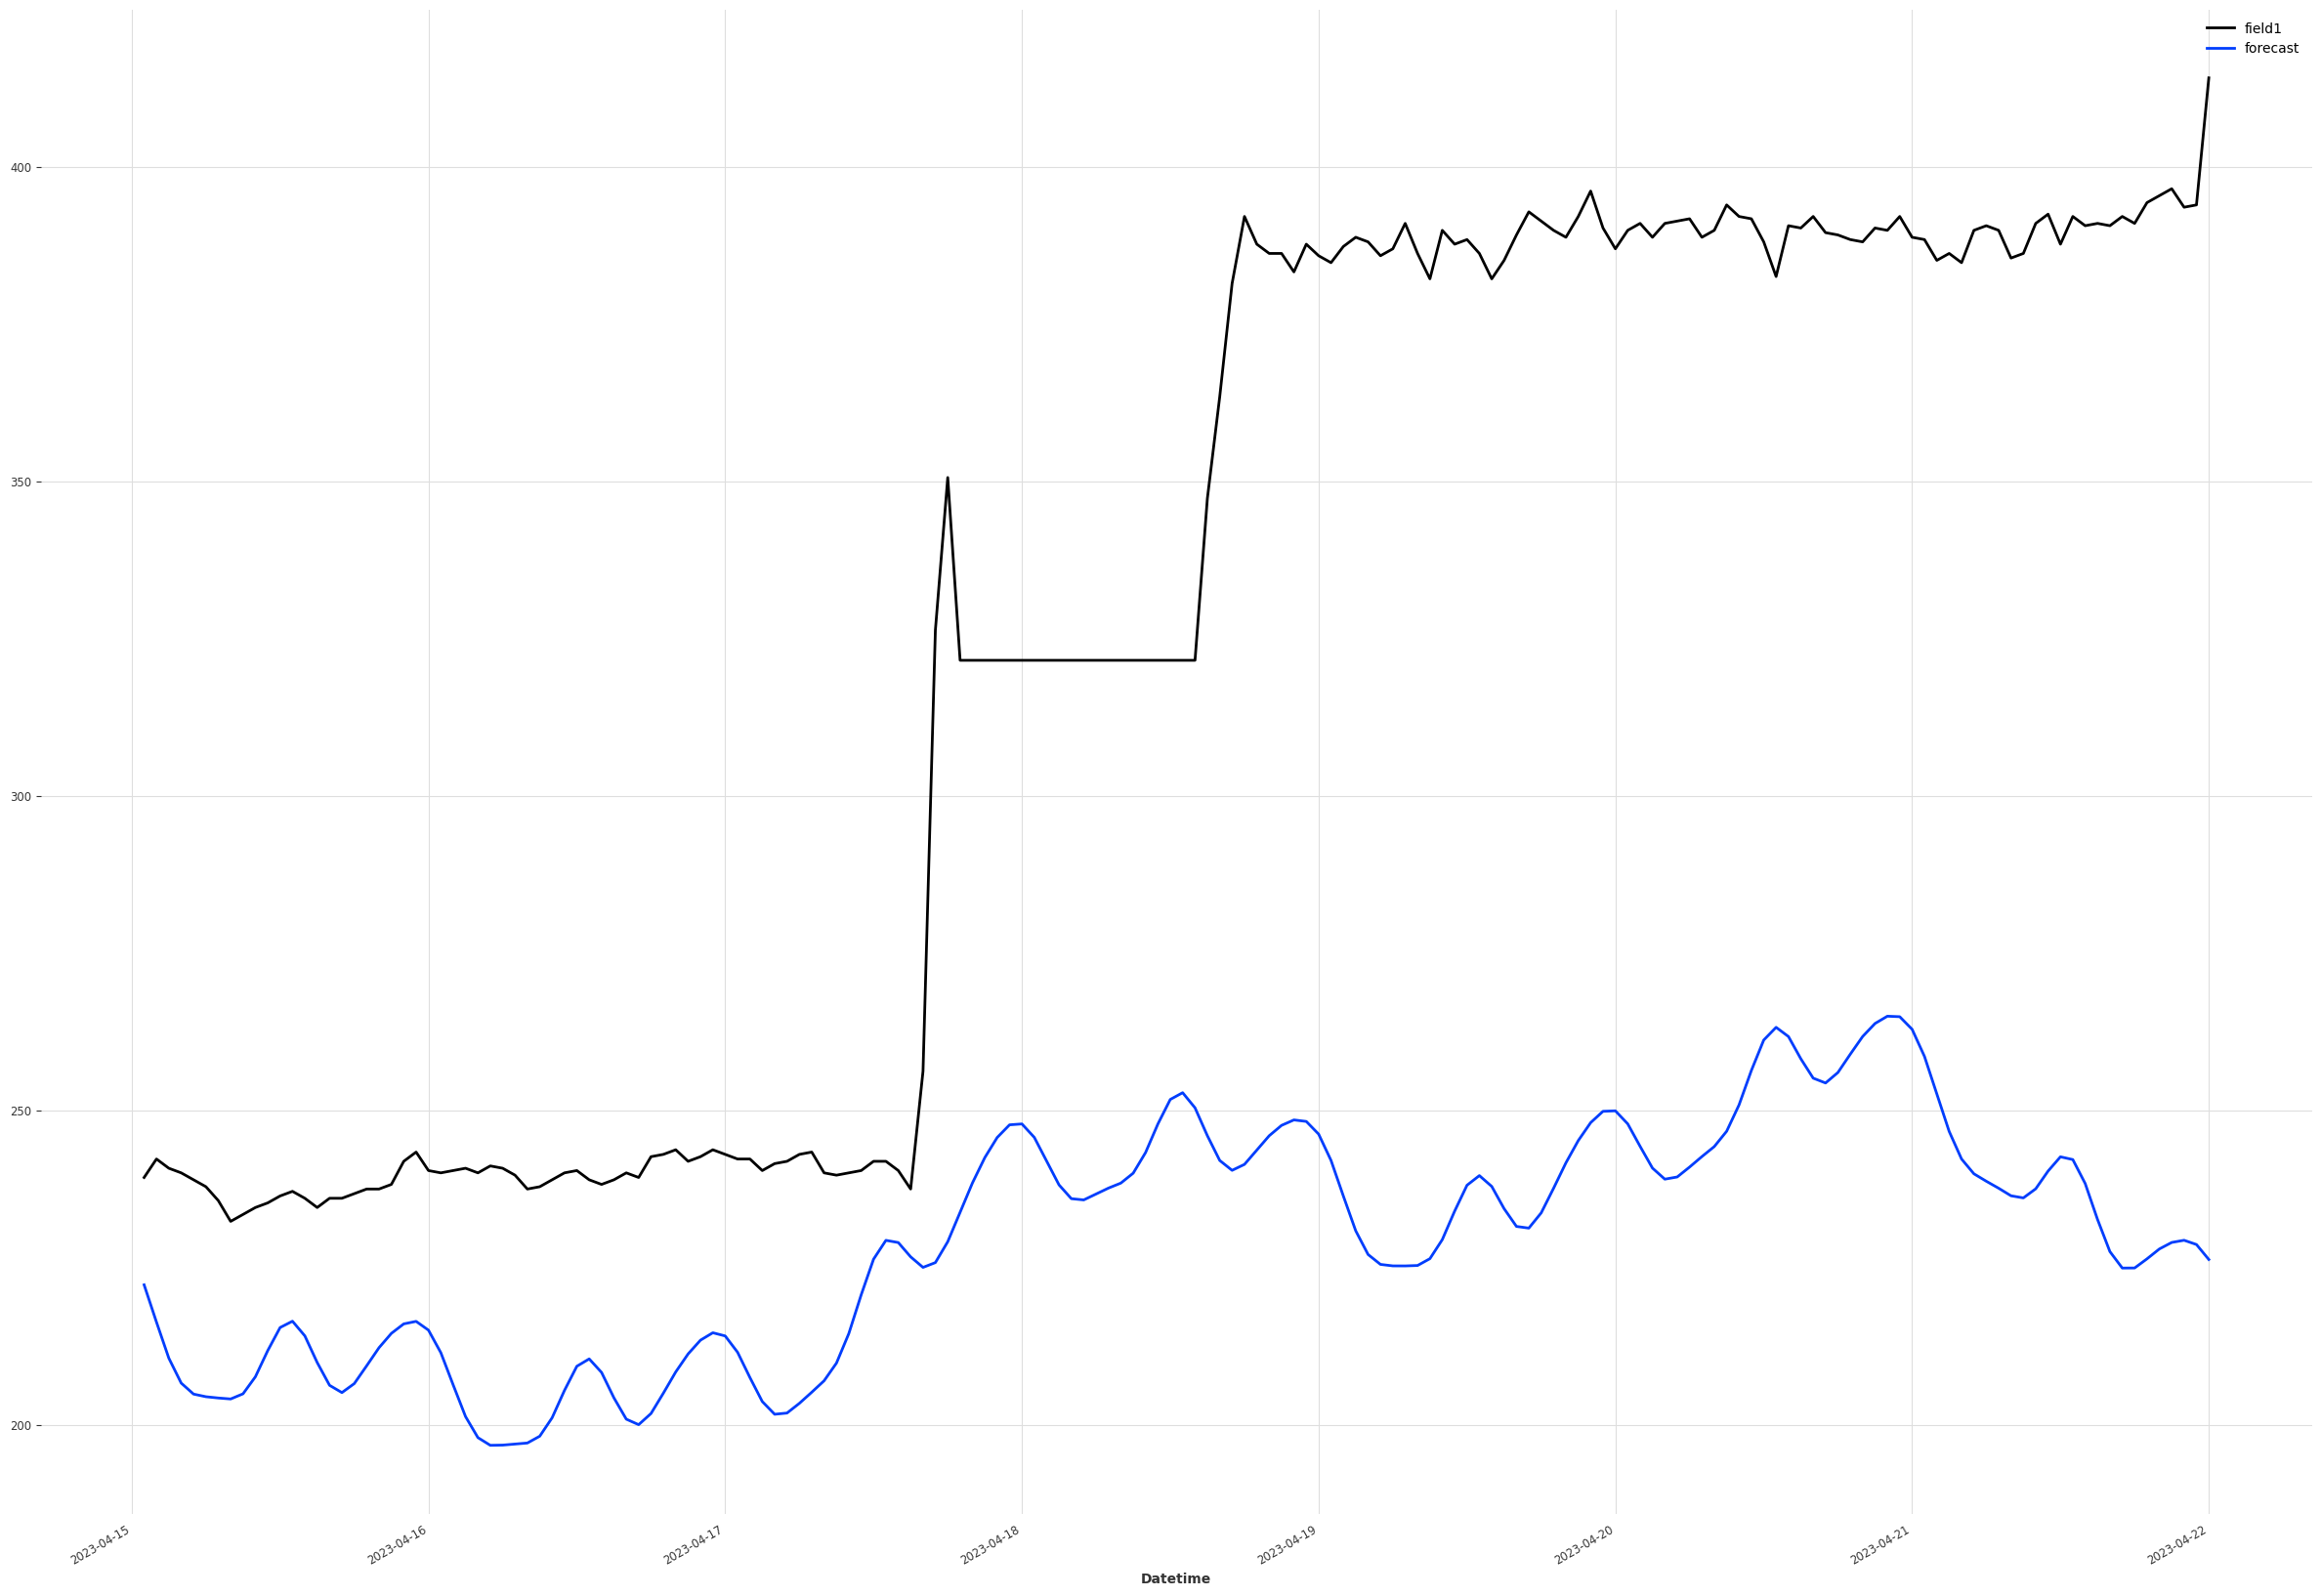

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 20]
val1.plot()
prediction1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

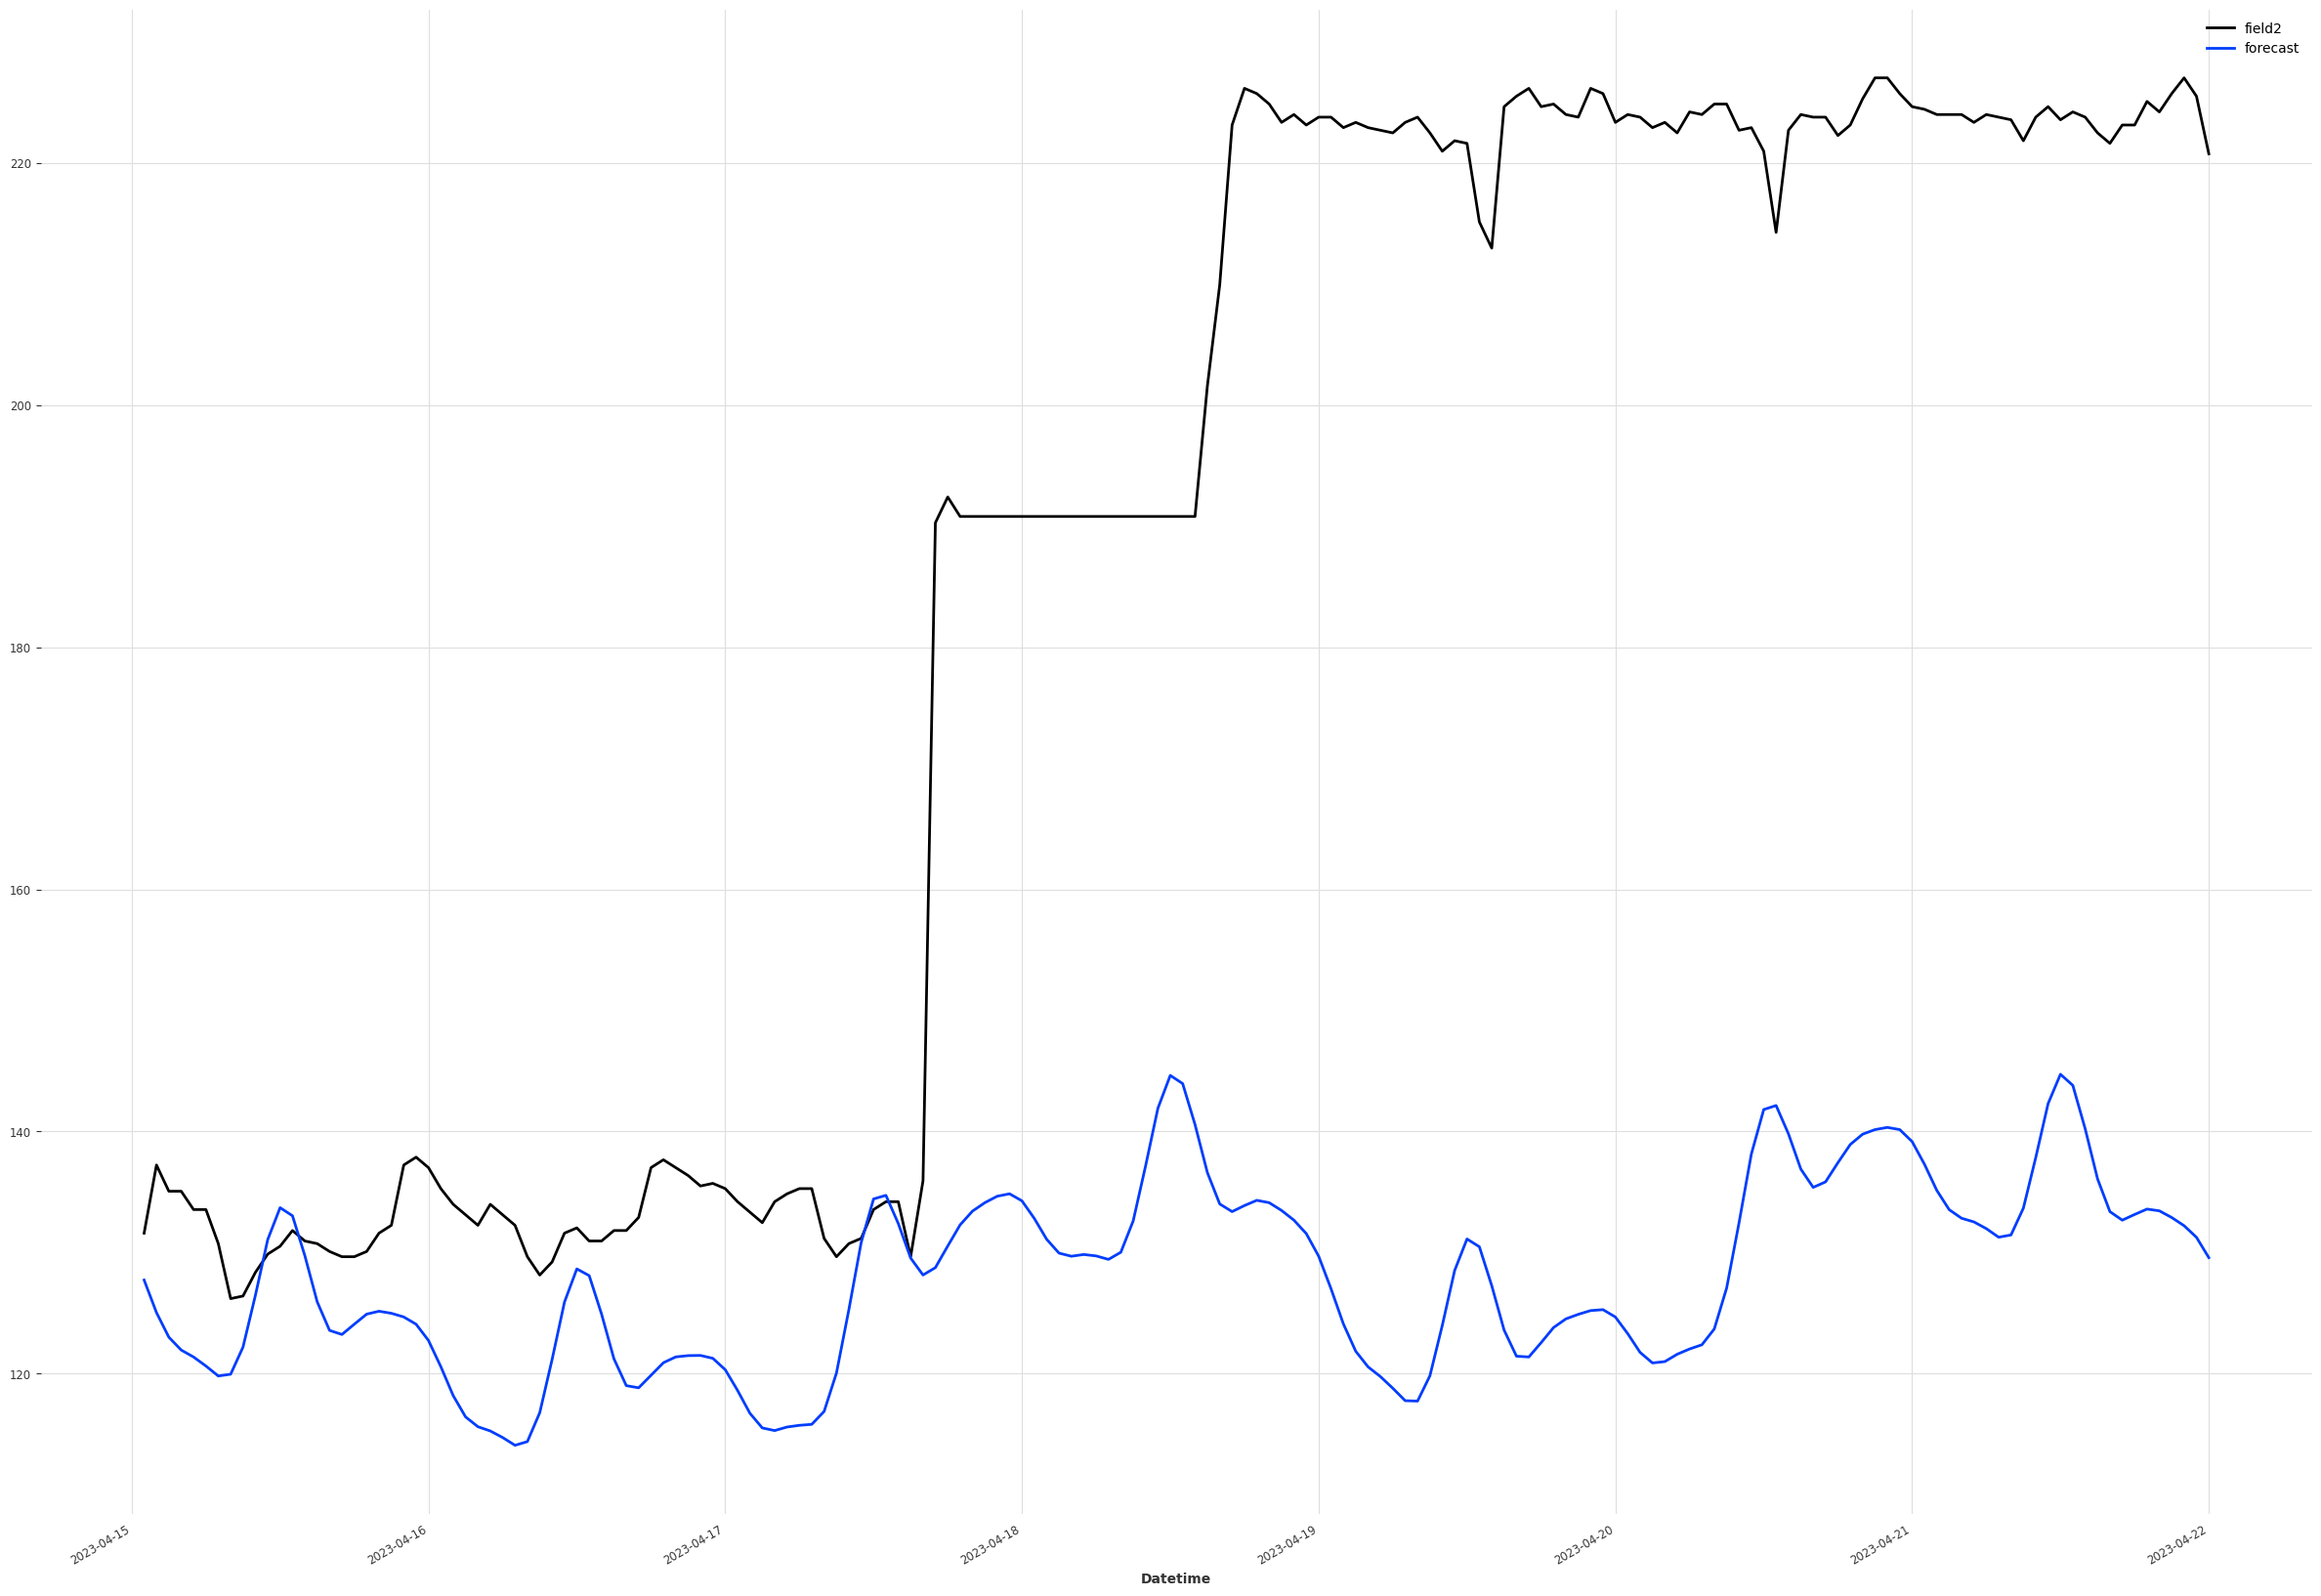

In [17]:
plt.rcParams['figure.figsize'] = [30, 20]
val2.plot()
prediction2.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

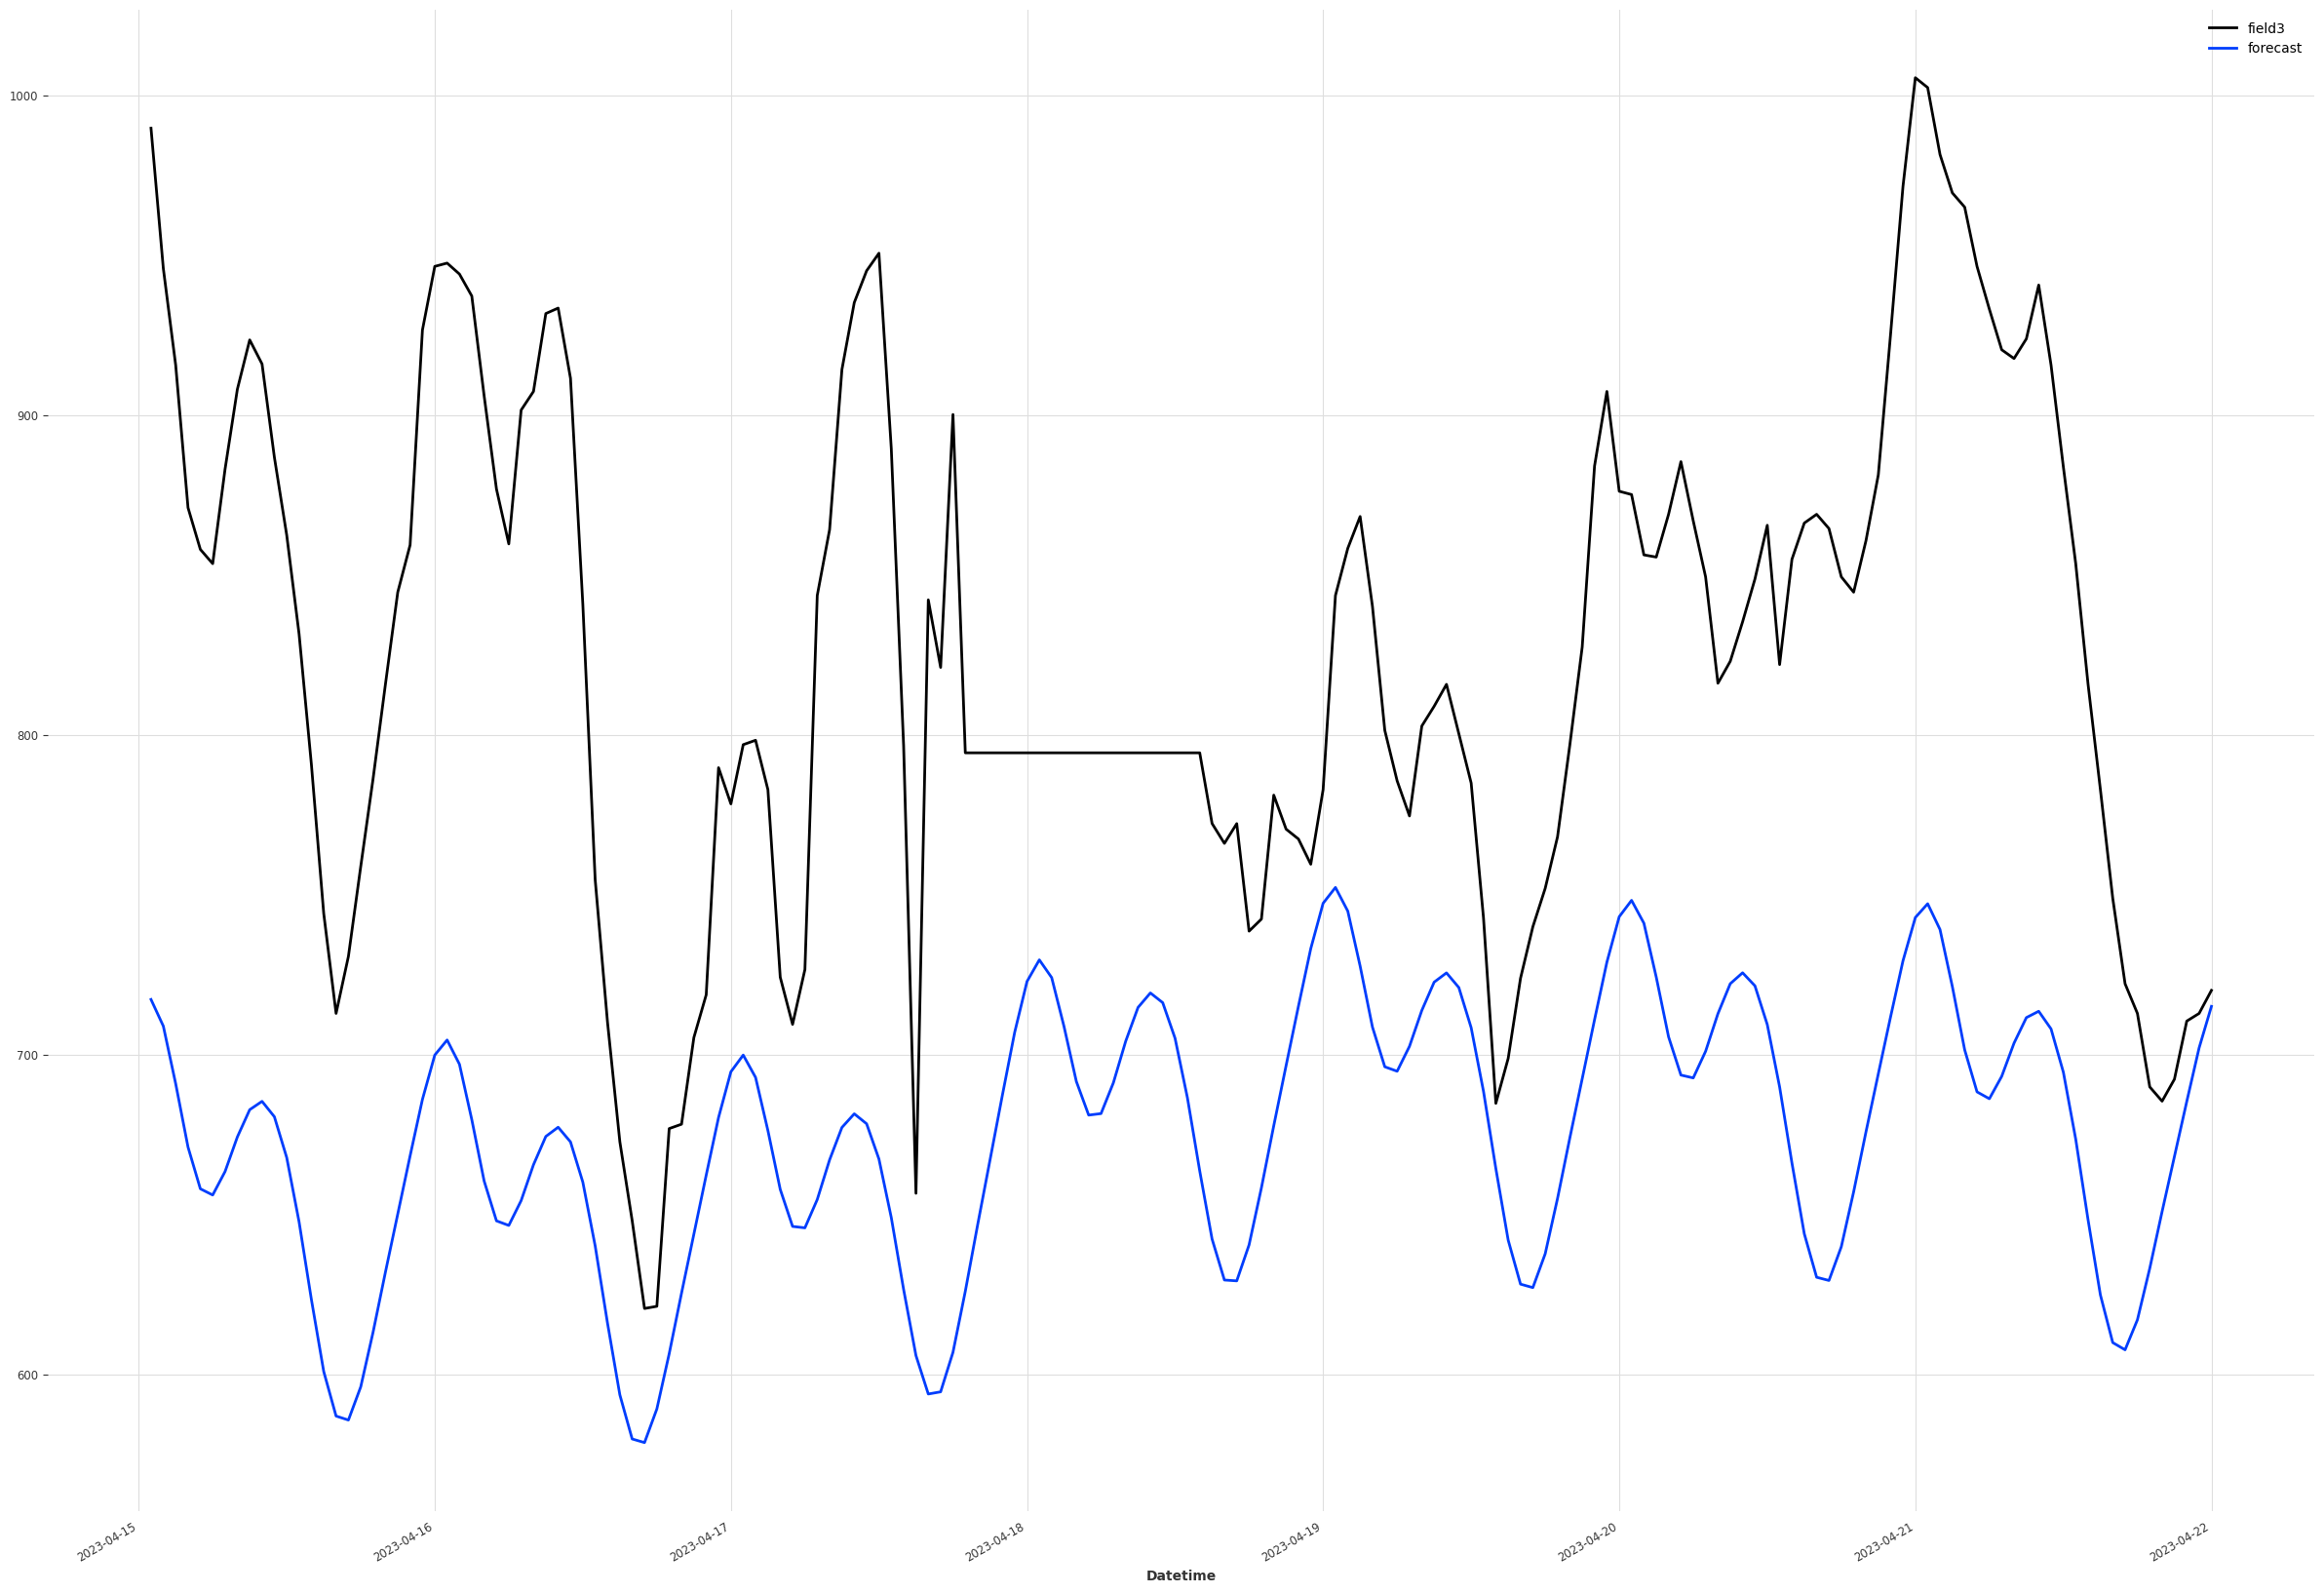

In [18]:
plt.rcParams['figure.figsize'] = [30, 20]
val3.plot()
prediction3.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

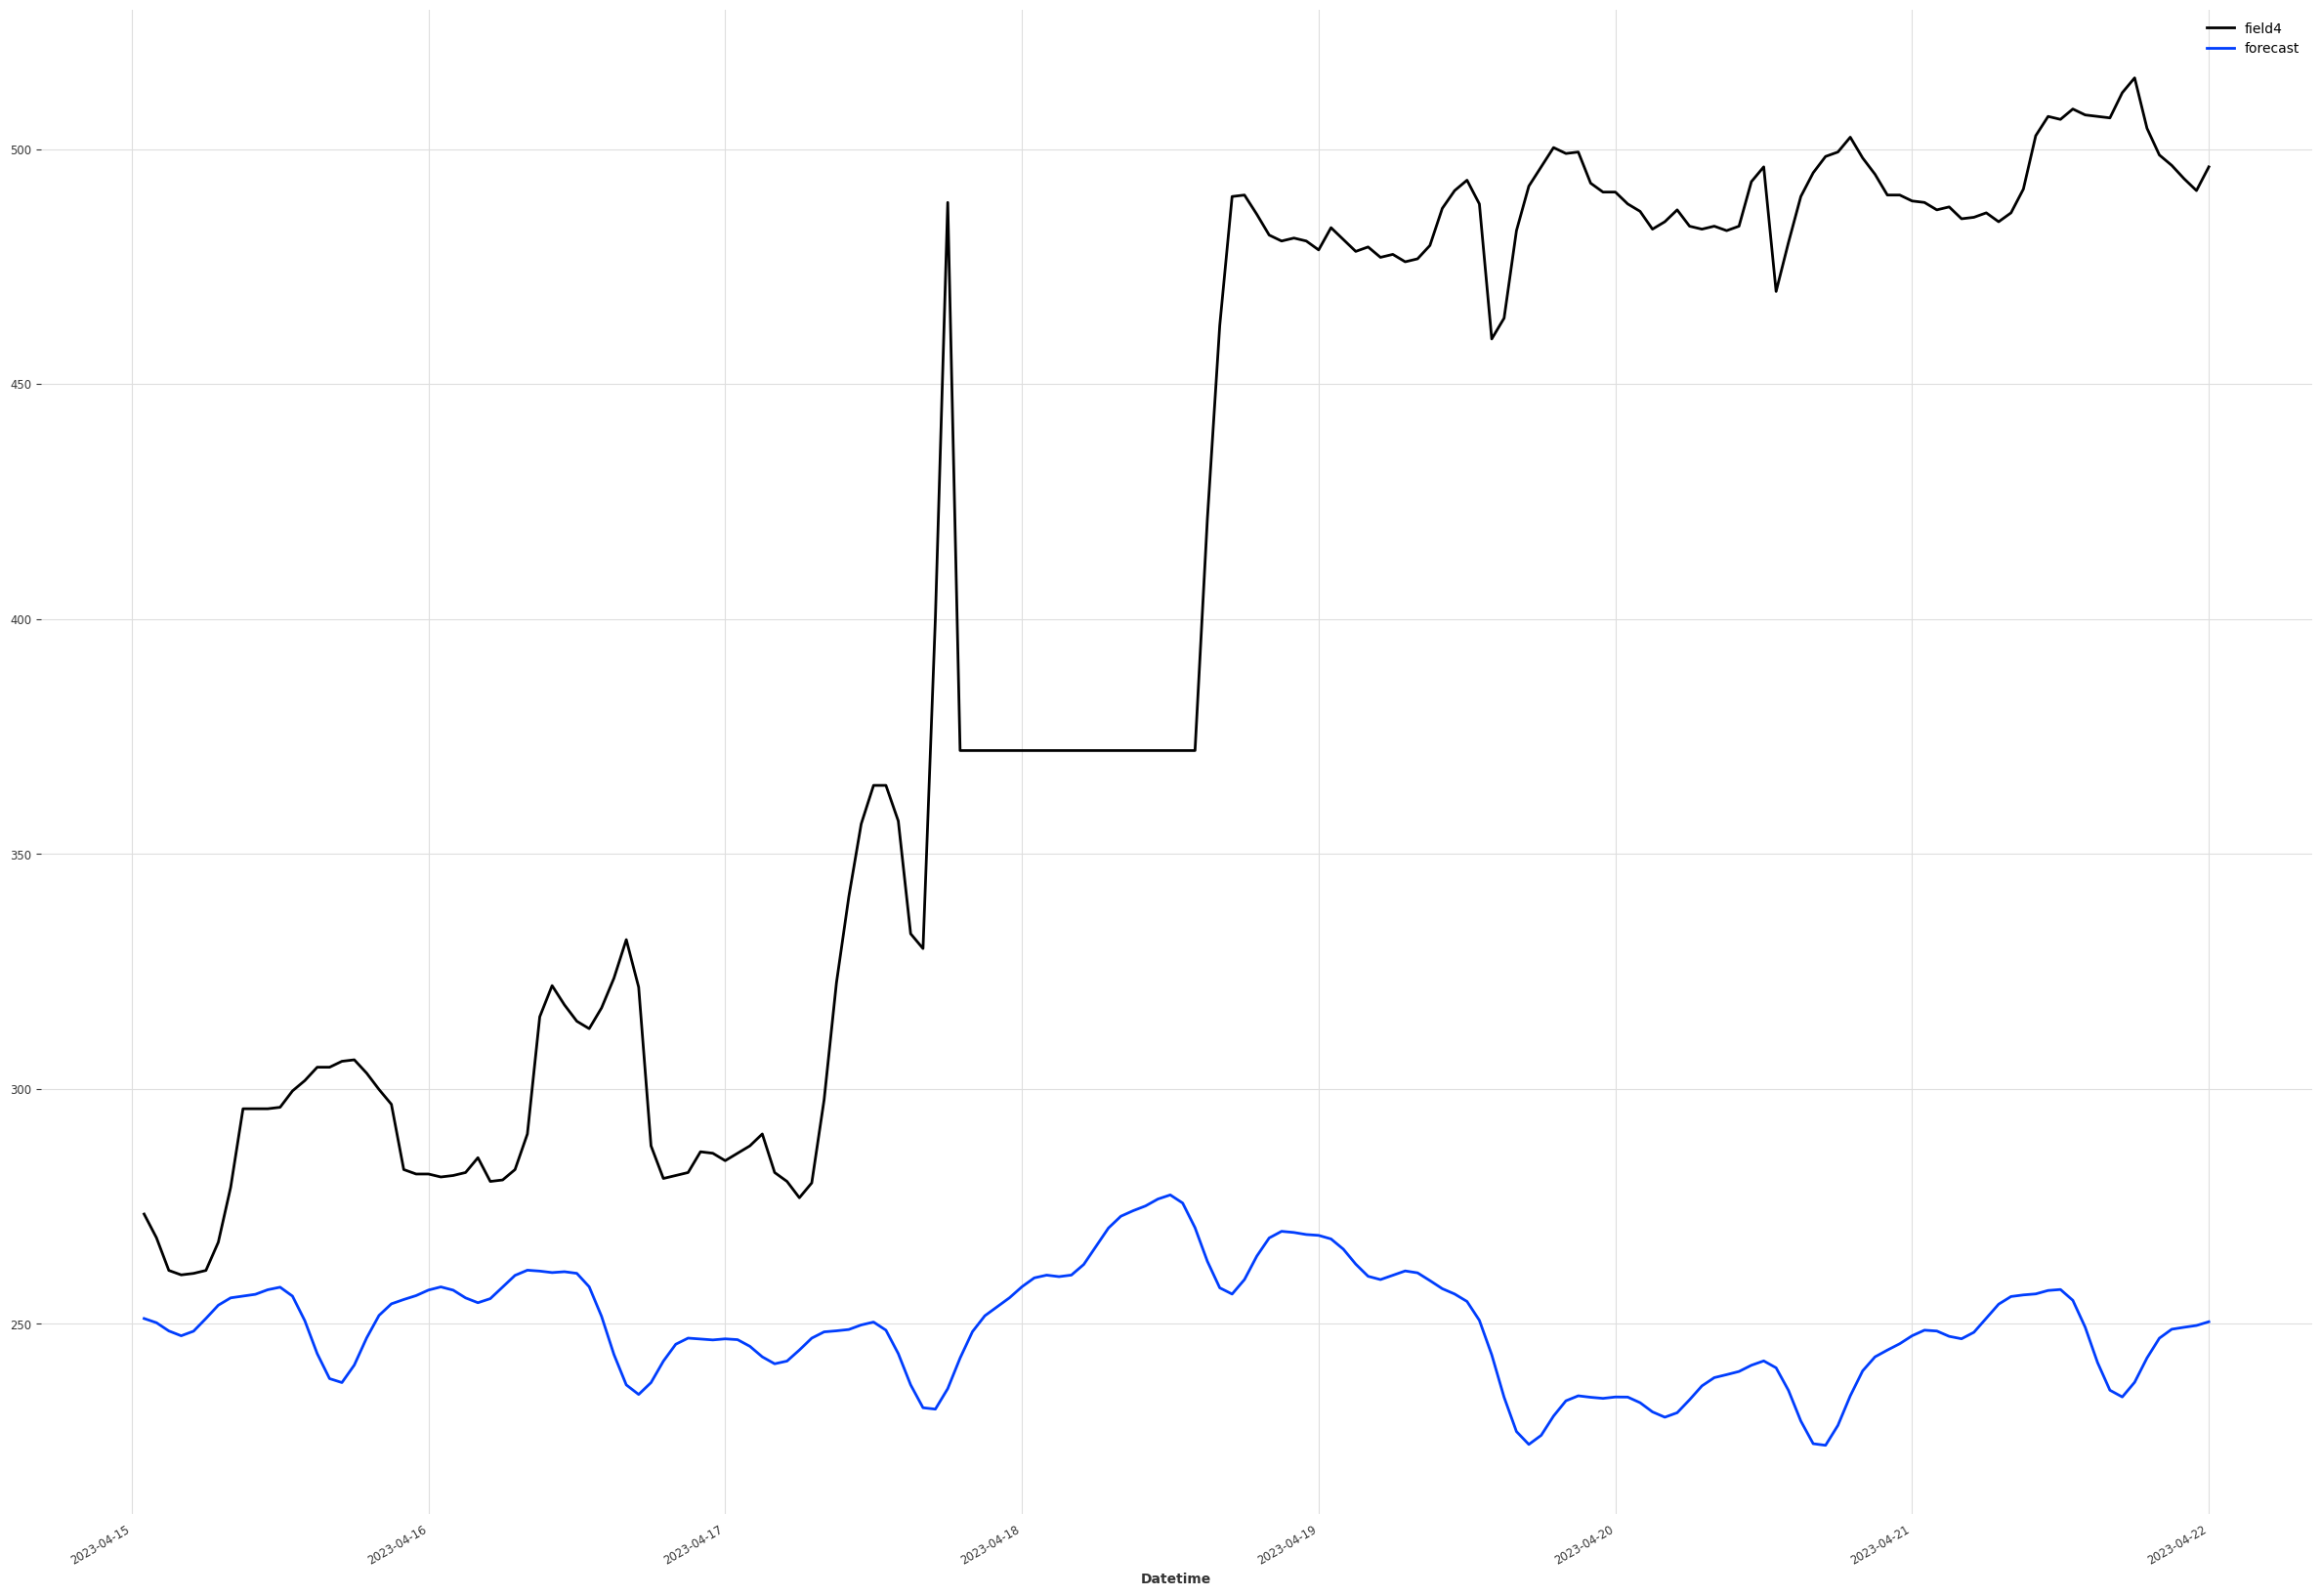

In [19]:
plt.rcParams['figure.figsize'] = [30, 20]
val4.plot()
prediction4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

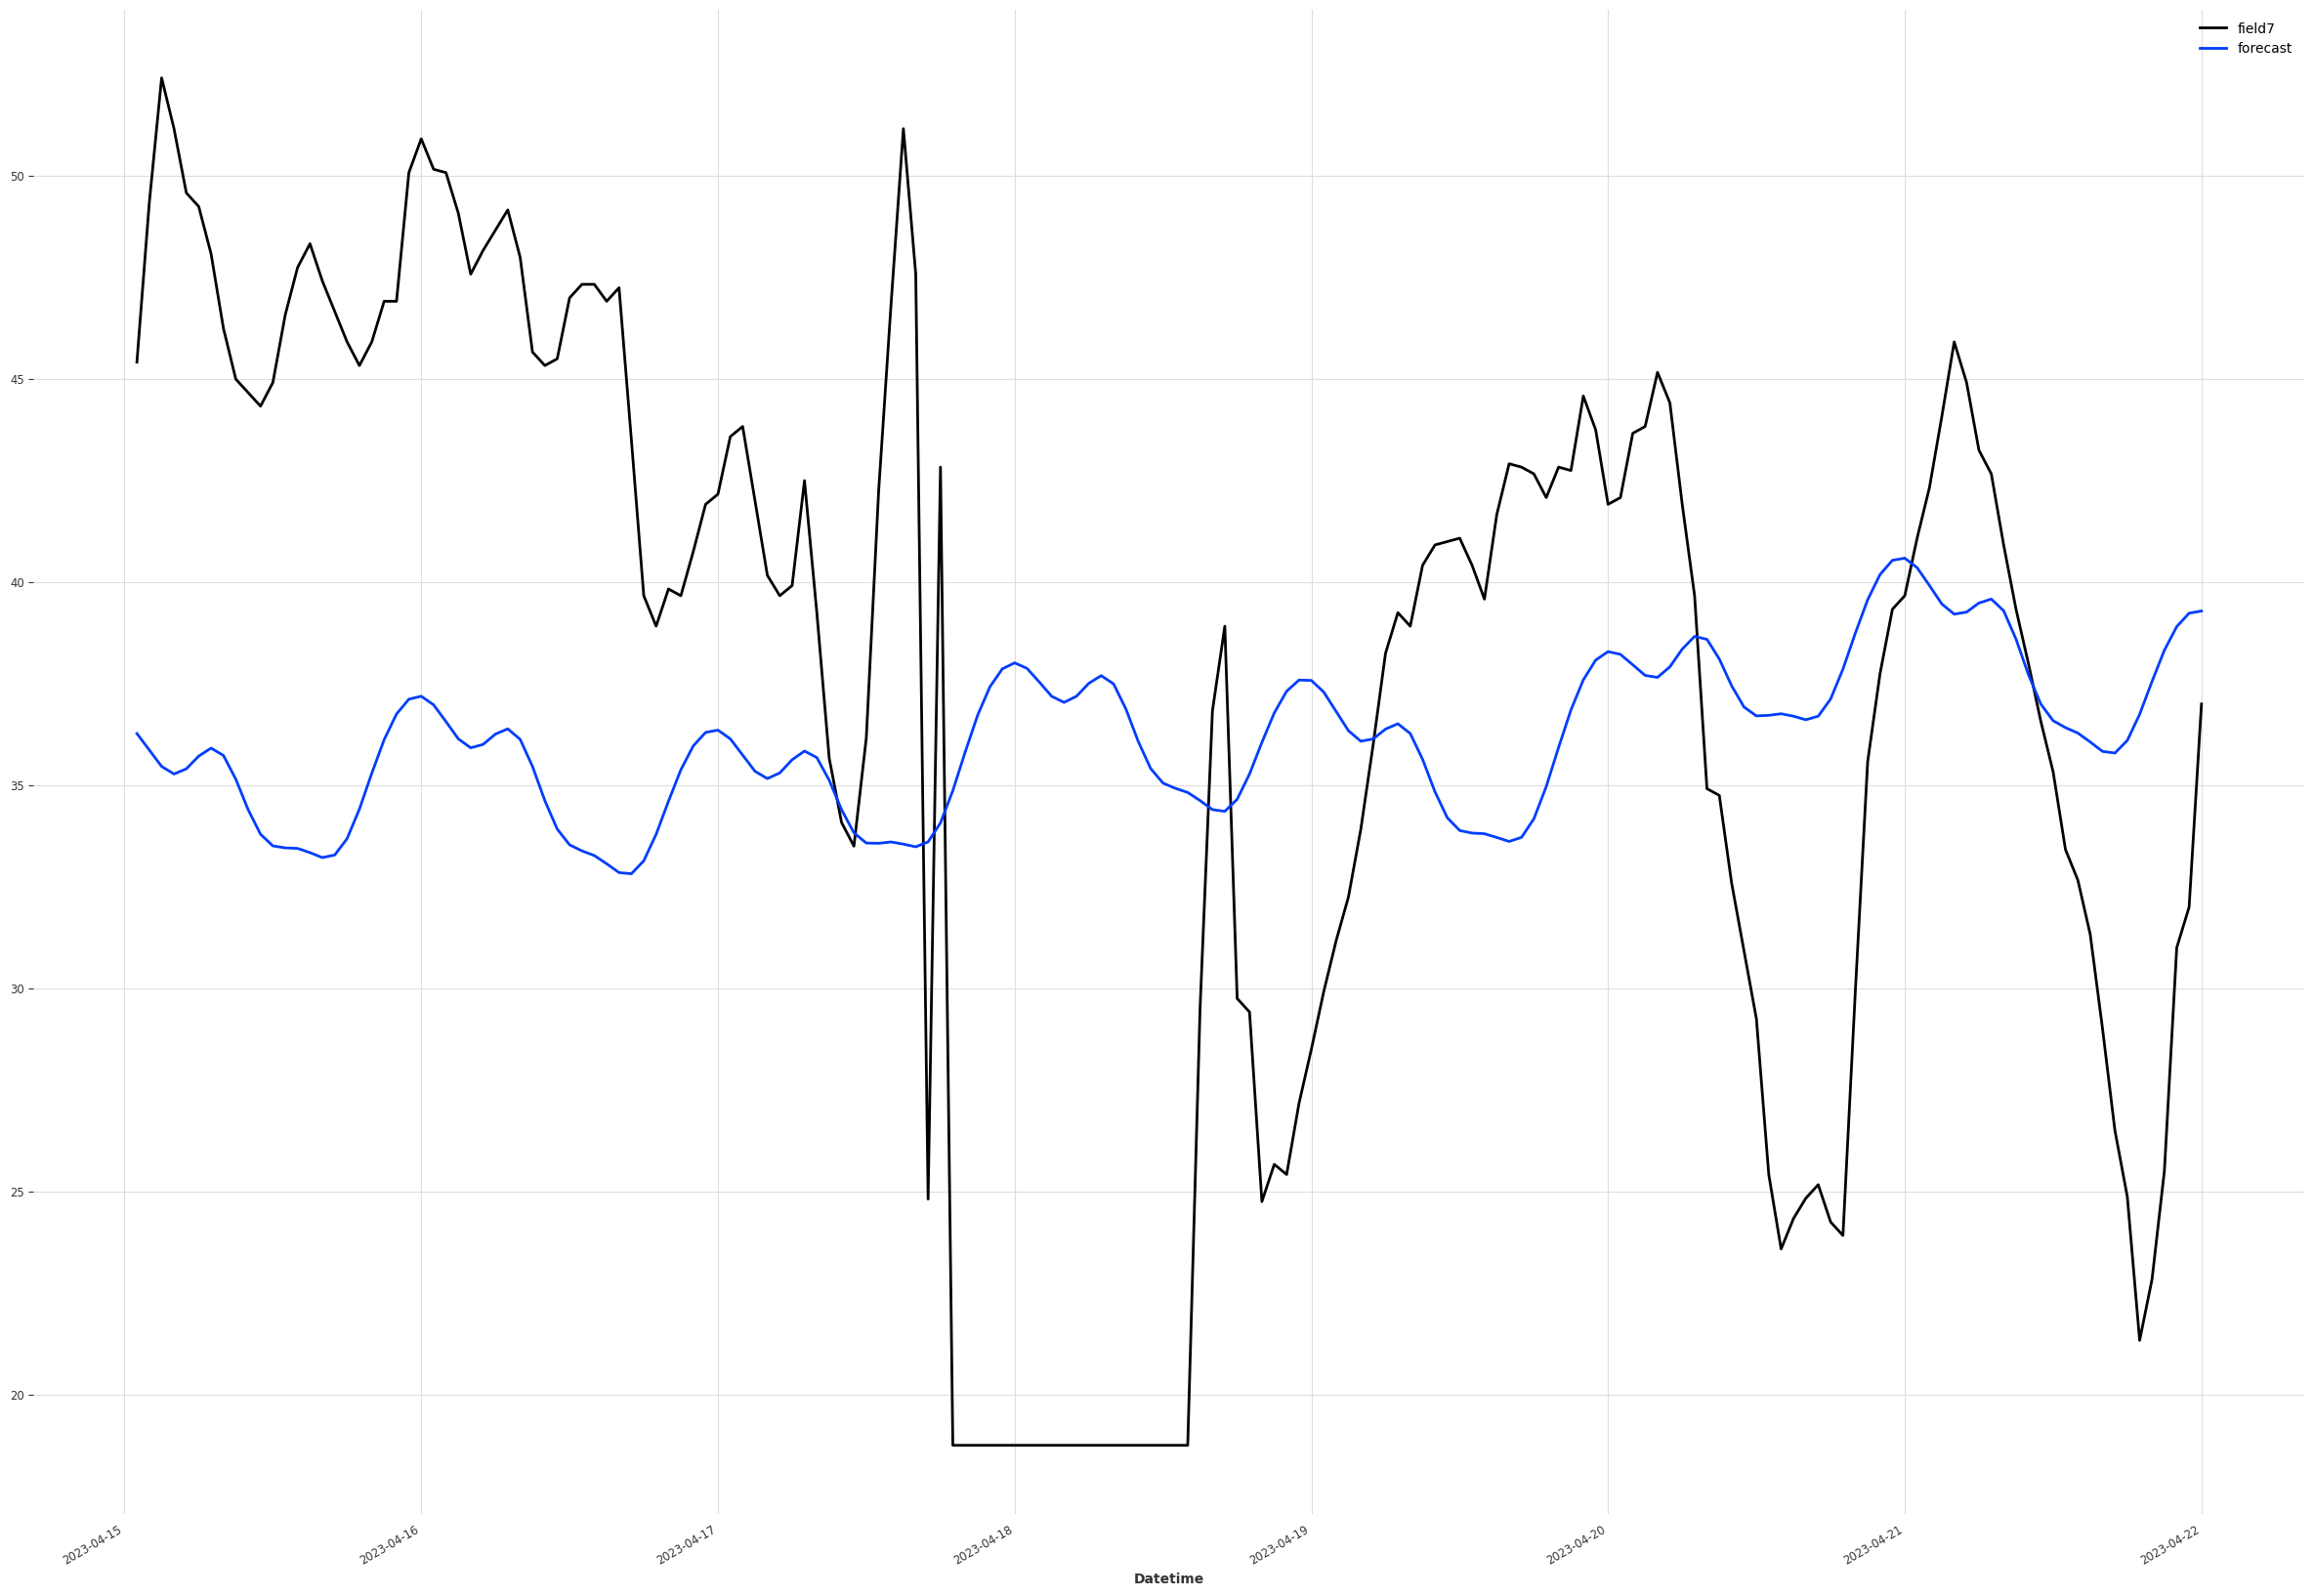

In [20]:
plt.rcParams['figure.figsize'] = [30, 20]
val7.plot()
prediction7.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

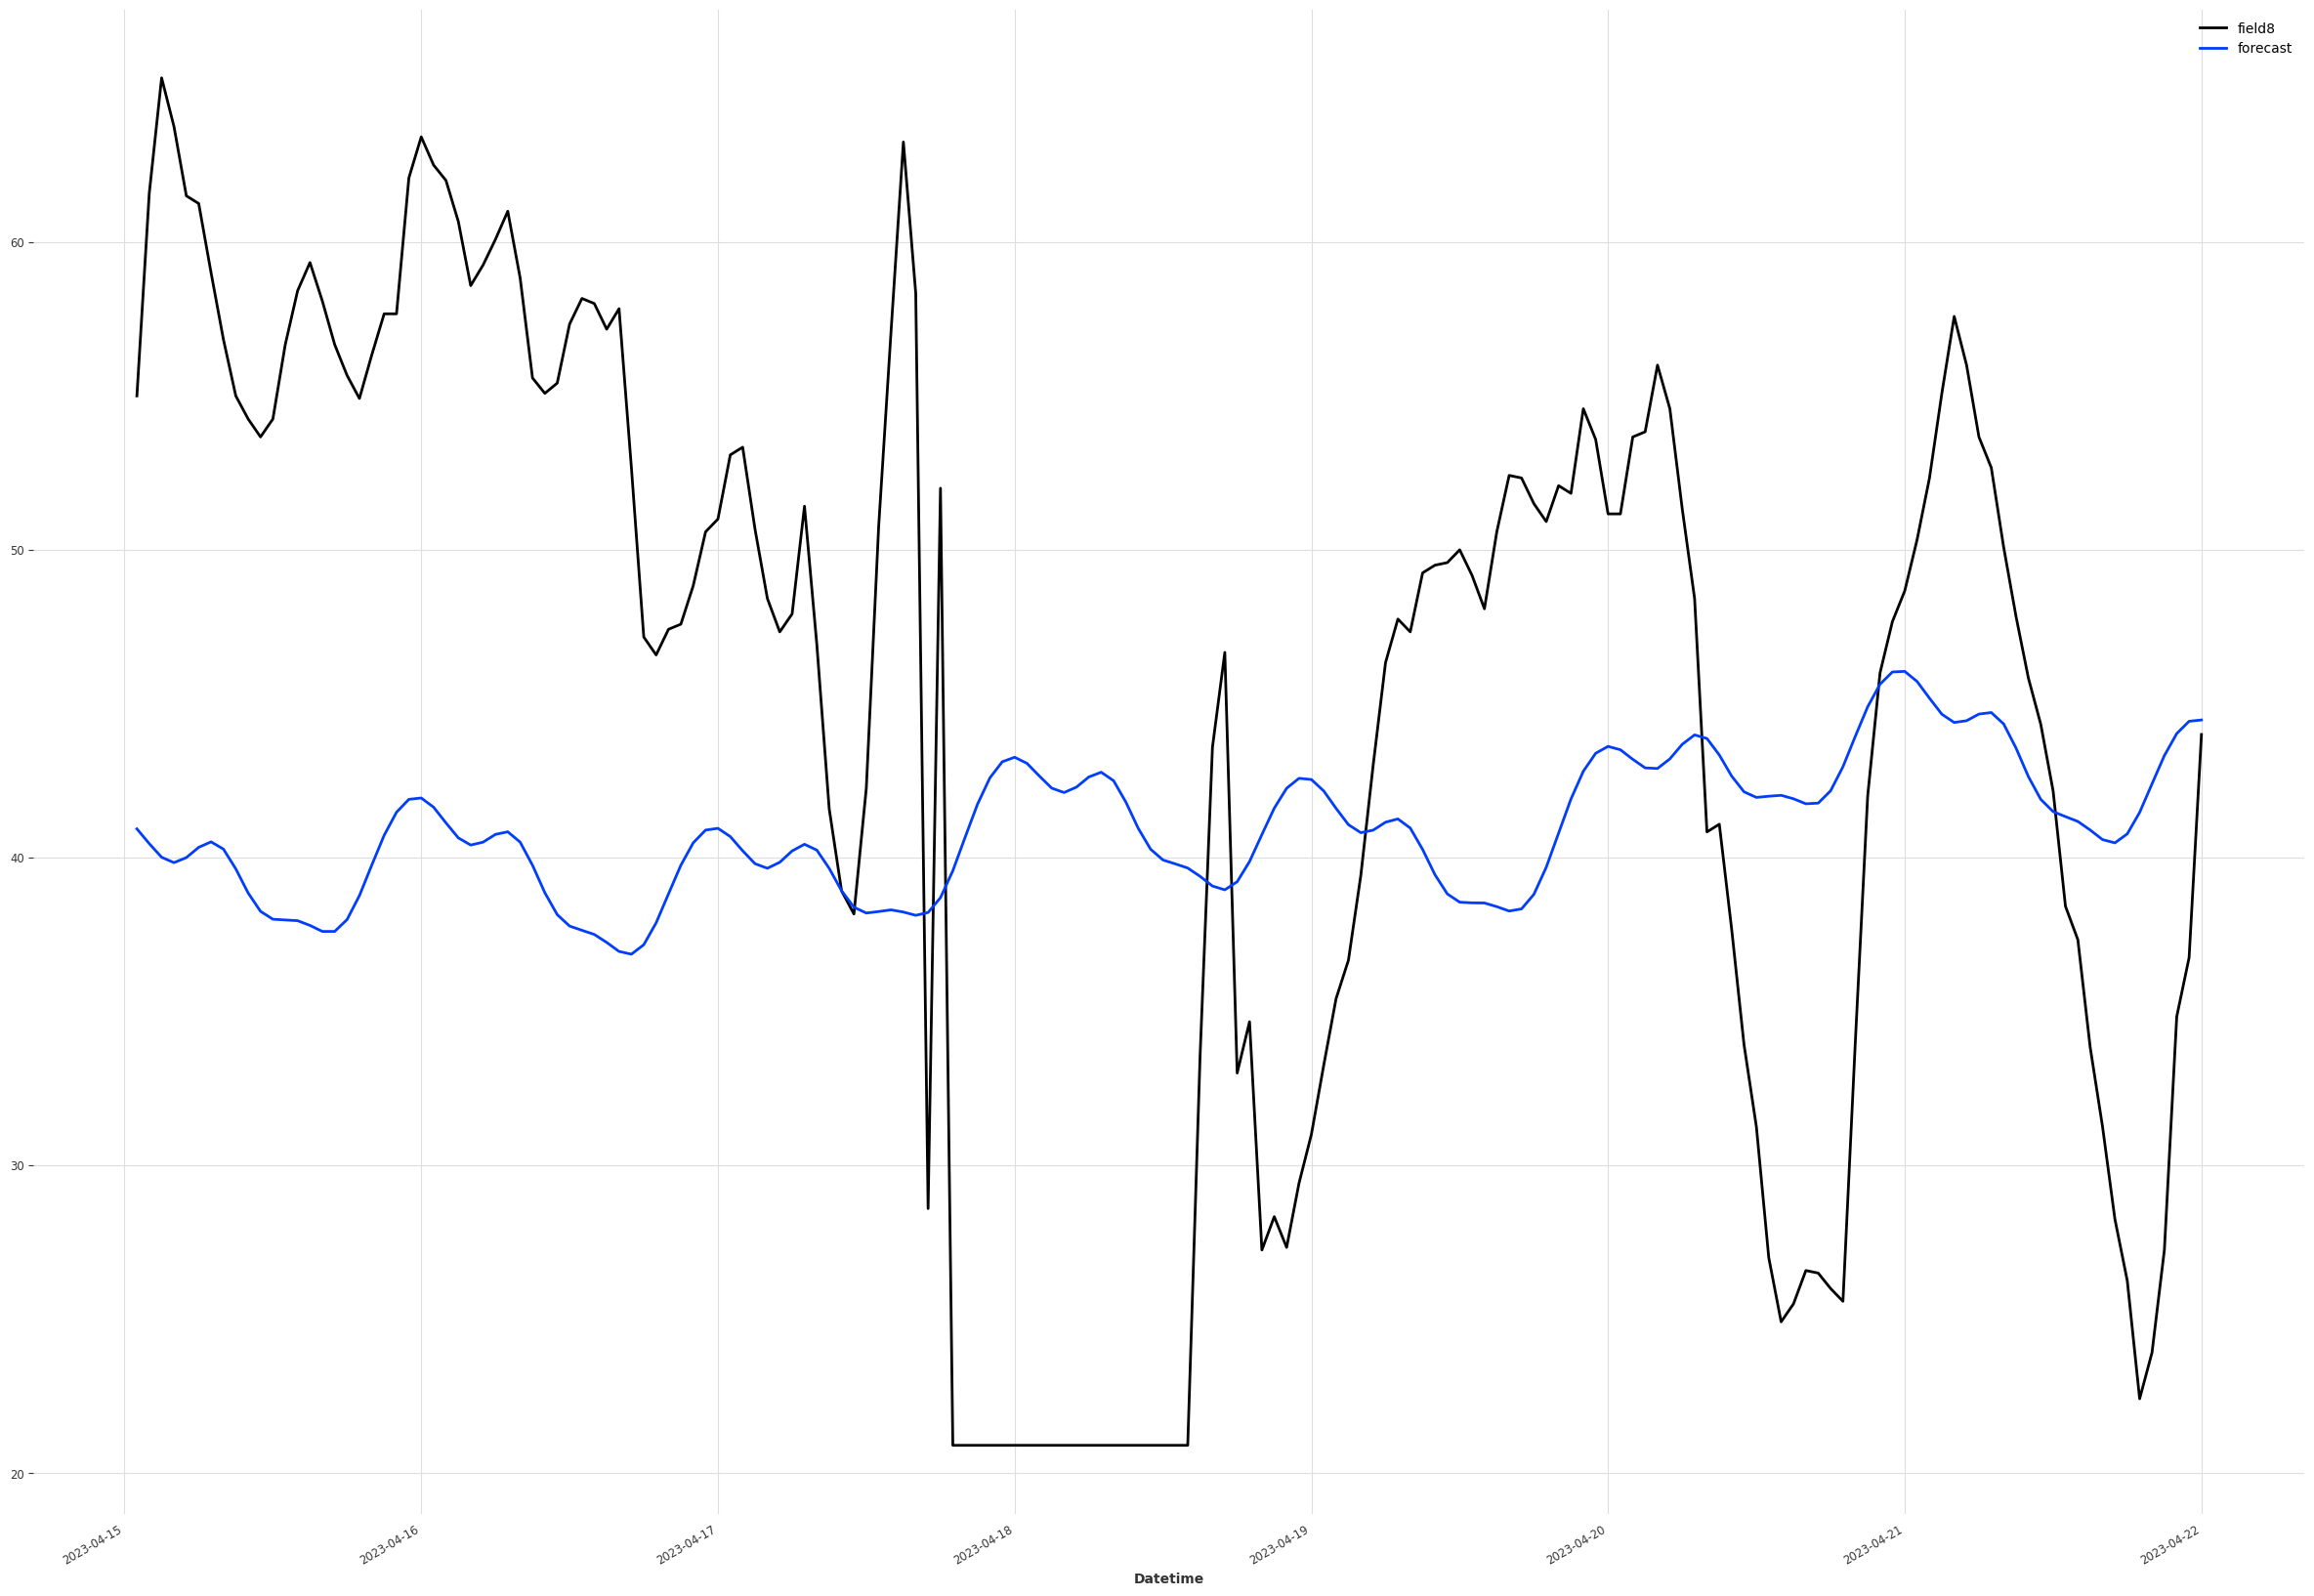

In [21]:
plt.rcParams['figure.figsize'] = [30, 20]
val8.plot()
prediction8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()